In [1]:
import sys
sys.path.insert(0, '../')
from NE204_Functions import *

plt.rcParams['figure.dpi'] = 300

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from sklearn.mixture import GaussianMixture

import matplotlib.animation as animation
from matplotlib.animation import FFMpegWriter

Plots directory already exists


In [2]:
data, saturated = import_data('../Lab-1/Data/Combined_Data/Cs137-24in-2.h5')

In [3]:
data, saturated = import_data('Data/Test-1021/Strong-Cs137-10sec_1.h5')

In [70]:
uncombined_dir = 'Data/Test-1021/'
uncombined_source = 'Pls'
uncombined_data = [uncombined_dir+f for f in os.listdir(uncombined_dir) if f != '.DS_Store' and uncombined_source in f]

file_name = '-'.join(uncombined_data[0].split('/')[-1].split('_')[0].split('-')[:-1])

datas = []
for i, file in enumerate(tqdm(uncombined_data, desc='Combining Files')):
    f = h5py.File(file, 'r')
    data_np = np.array(f['raw_data'])
    time_event, unique_times = np.unique(np.array(f['event_data']['timestamp']), return_index=True)
    
    data_np_crop = data_np[unique_times]
    
    datas.append(data_np_crop)
merge_data = np.concatenate(datas)

fmerged = h5py.File('Data/Combined_Data/{}-{}.h5'.format(file_name, i+1), 'w')
fmerged.create_dataset('raw_data', data=merge_data)

fmerged.close()

Combining Files:   0%|          | 0/6 [00:00<?, ?it/s]

In [4]:
data_old, saturated = import_data('../Lab-1/Data/Combined_Data/Uncombined_Data/Co60-36in-1min_1.h5')

In [5]:
data_new, saturated = import_data('Data/Combined_Data/Pls-Be-Alive-6.h5')

In [64]:
len(data)

6096

In [6]:
energies_old, energies_inds = calibrate_pulses(data_old, return_inds=True)

Creating spectra:   0%|          | 0/10149 [00:00<?, ?it/s]

In [7]:
energies_new = calibrate_pulses(data_new)

Creating spectra:   0%|          | 0/11719 [00:00<?, ?it/s]

Index 367 failed to fit or create trapezoid
Index 523 failed to fit or create trapezoid
Index 669 failed to fit or create trapezoid
Index 1026 failed to fit or create trapezoid
Index 1204 failed to fit or create trapezoid
Index 1734 failed to fit or create trapezoid
Index 1866 failed to fit or create trapezoid
Index 2330 failed to fit or create trapezoid
Index 2460 failed to fit or create trapezoid
Index 3033 failed to fit or create trapezoid
Index 3148 failed to fit or create trapezoid
Index 3789 failed to fit or create trapezoid
Index 3932 failed to fit or create trapezoid
Index 3942 failed to fit or create trapezoid
Index 4812 failed to fit or create trapezoid
Index 4913 failed to fit or create trapezoid
Index 5495 failed to fit or create trapezoid
Index 5888 failed to fit or create trapezoid
Index 6269 failed to fit or create trapezoid
Index 6711 failed to fit or create trapezoid
Index 8321 failed to fit or create trapezoid
Index 9055 failed to fit or create trapezoid
Index 9708 fa

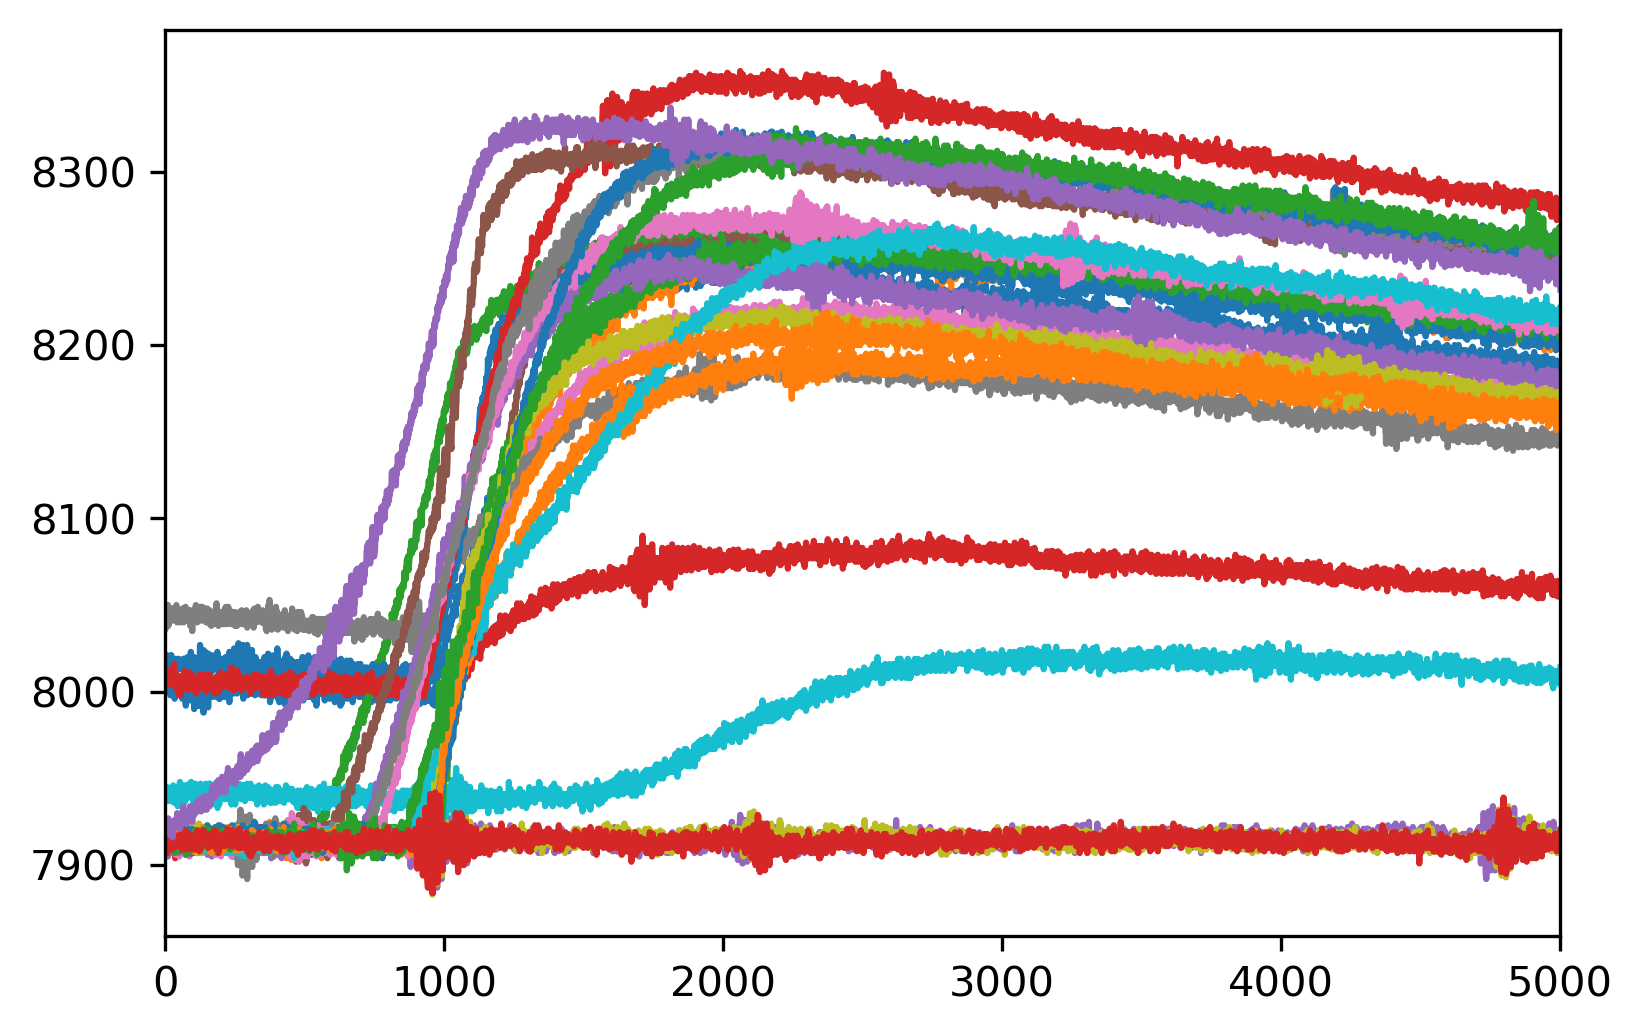

In [77]:
for i in range(25):
    if i not in saturated:
        plt.plot(data_new[i]) #, alpha=0.5)
plt.xlim(0, 5000)
plt.show()

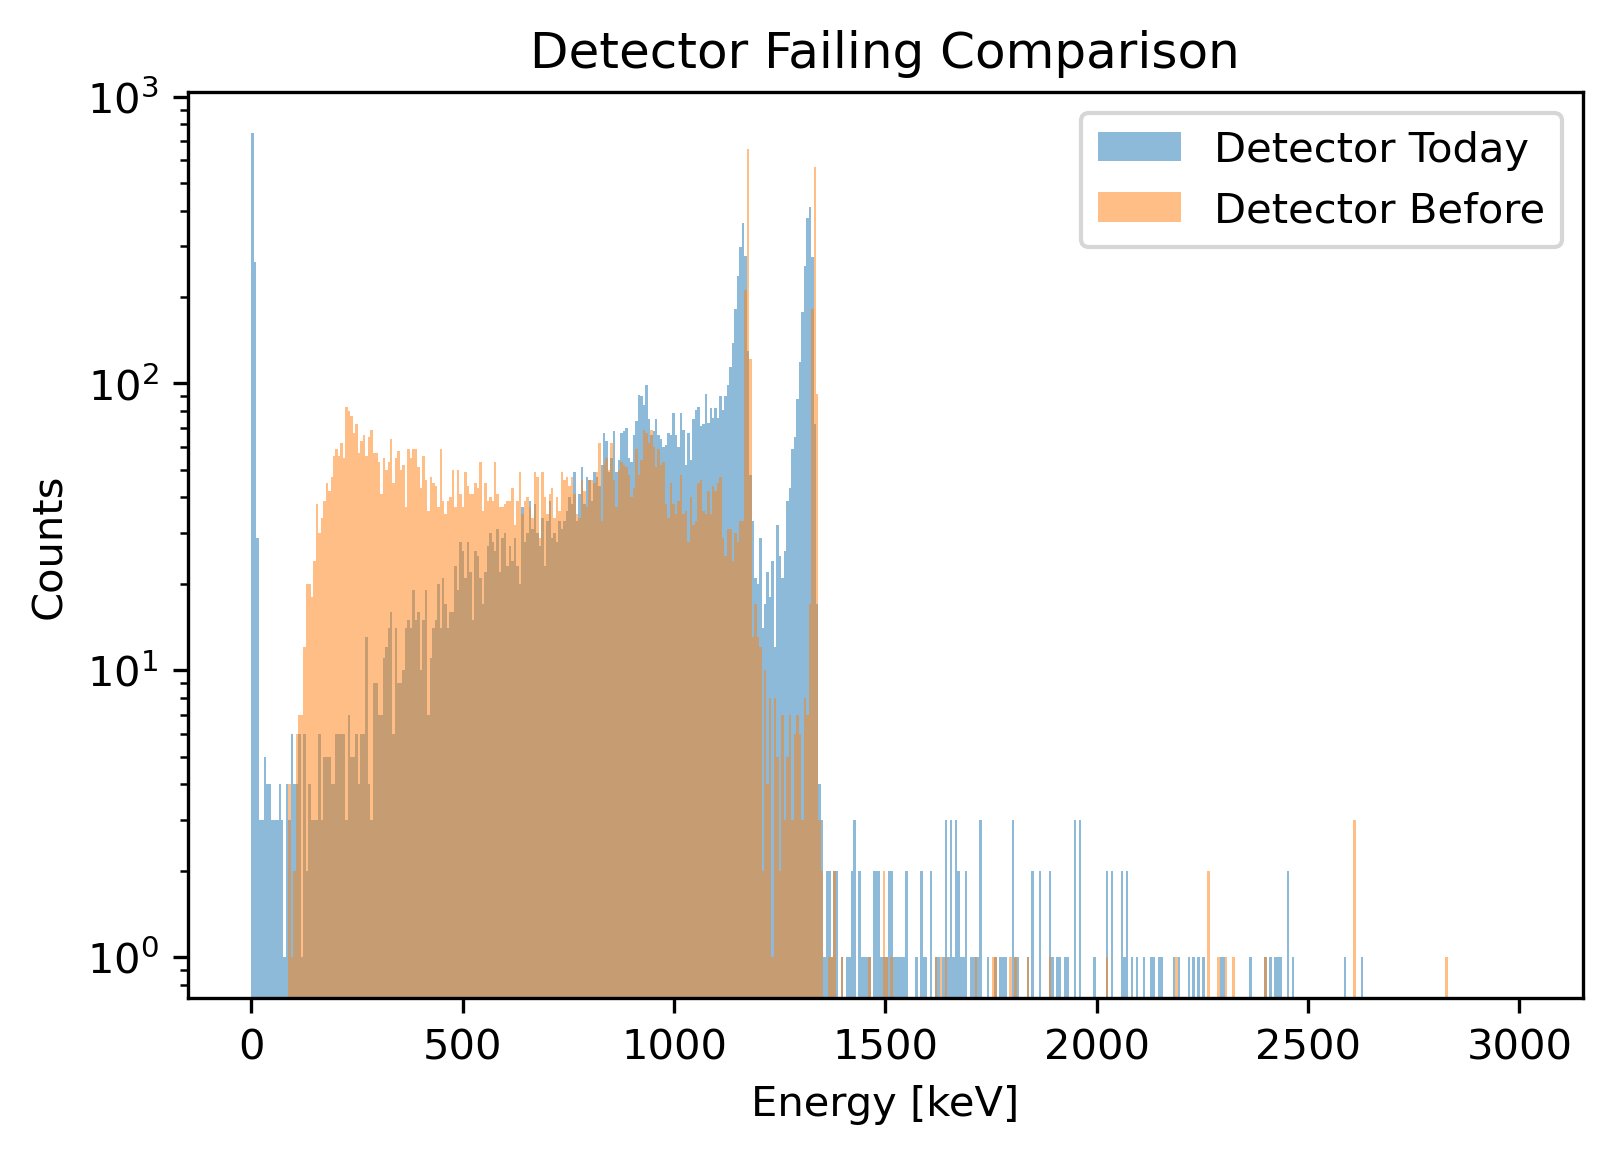

In [8]:
bins_ = np.linspace(0,3000,2**9+1)
plt.hist(energies_new, bins=bins_, alpha=0.5, label='Detector Today')
plt.hist(energies_old, bins=bins_, alpha=0.5, label='Detector Before')
plt.legend()
plt.semilogy()
plt.title('Detector Failing Comparison')
plt.ylabel('Counts')
plt.xlabel('Energy [keV]')
plt.savefig('Plots/old-dead-comparison.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

In [18]:
data, saturated = import_data('../Lab-1/Data/Combined_Data/Cs137-24in-2.h5')
energies, energies_inds = import_lab1_energies('Cs137', indexes=True)

Loading in calibrated Cs137 spectra


In [19]:
cs_photopeak_inds = np.argwhere((energies>=652) & (energies<=670))
cs_photopeak_inds = cs_photopeak_inds.reshape(len(cs_photopeak_inds),)
cs_photopeak_inds = energies_inds[cs_photopeak_inds]

cs_photopeak = np.copy(data[cs_photopeak_inds])

In [106]:
data[cs_photopeak_inds[21]].reshape(1,len(data[0]))

array([[7913, 7906, 7912, ..., 8141, 8147, 8144]], dtype=uint16)

In [61]:
calibrate_pulses(data[cs_photopeak_inds[2775]].reshape(1,62500))

Creating spectra:   0%|          | 0/1 [00:00<?, ?it/s]

array([662.14101515])

In [68]:
cs_photopeak_inds[703]

2322

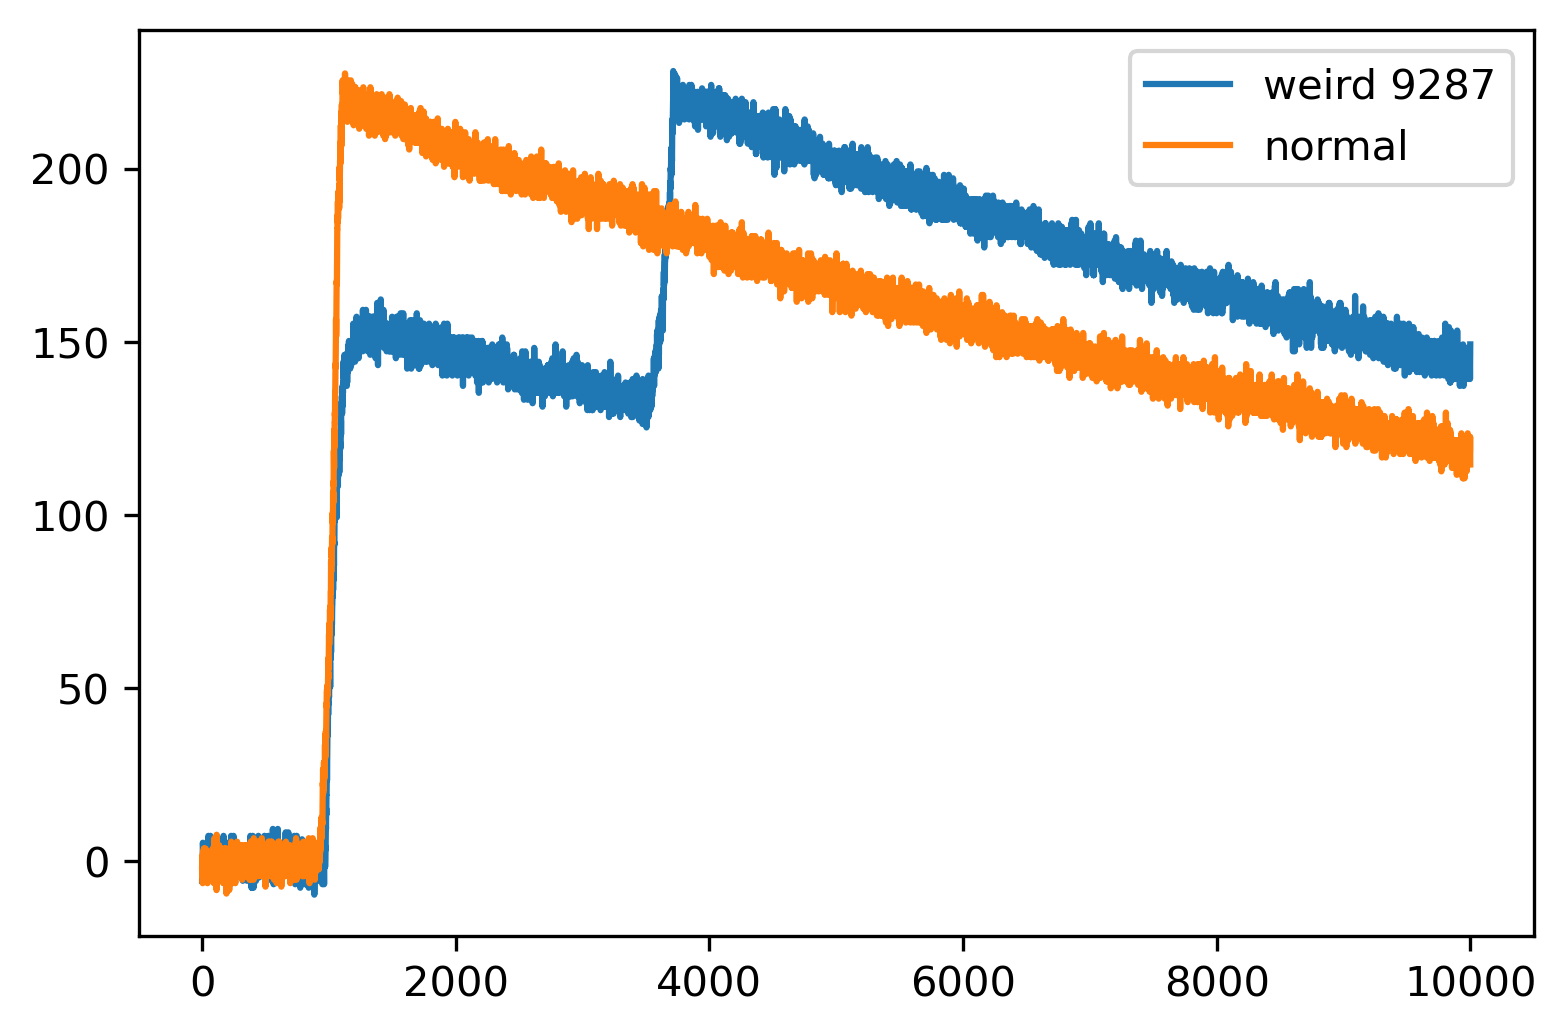

In [9]:
end = 10000
plt.plot(reset_zero(cs_photopeak[2775][:end]), label='weird {}'.format(cs_photopeak_inds[2775]))
plt.plot(reset_zero(cs_photopeak[2][:end]), label='normal')
plt.legend()
plt.show()

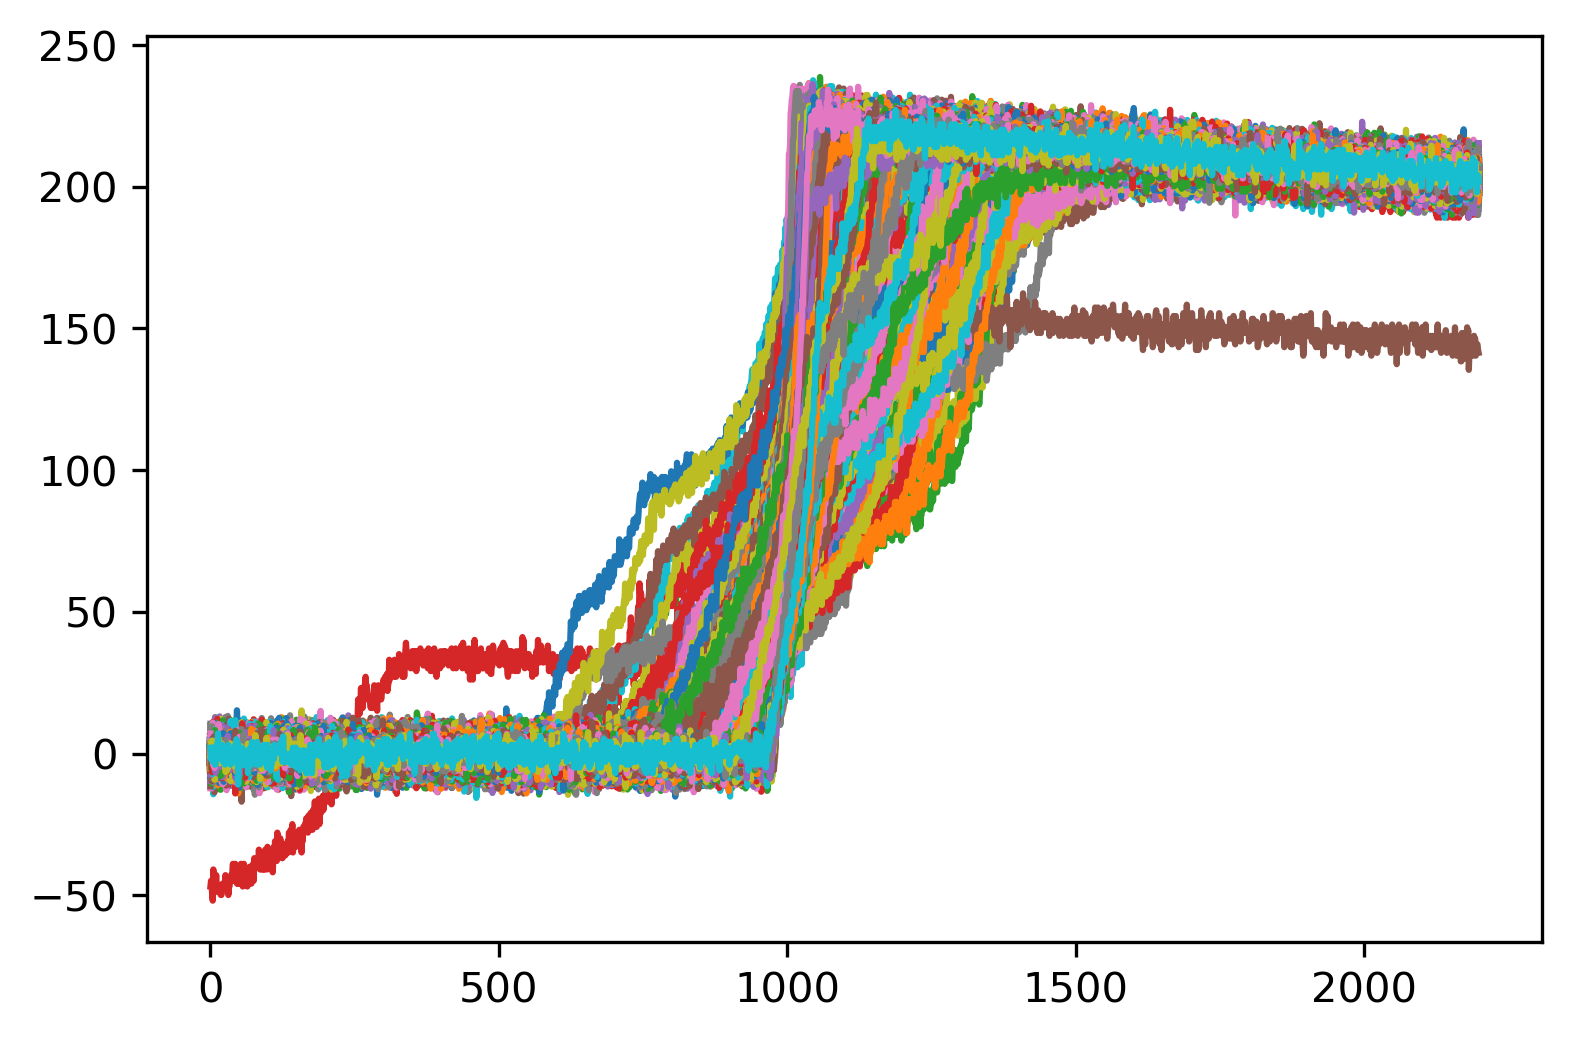

In [9]:
for i in range(len(cs_photopeak)):
    plt.plot(reset_zero(cs_photopeak[i][:2200]))
#plt.ylim(7700,9000)

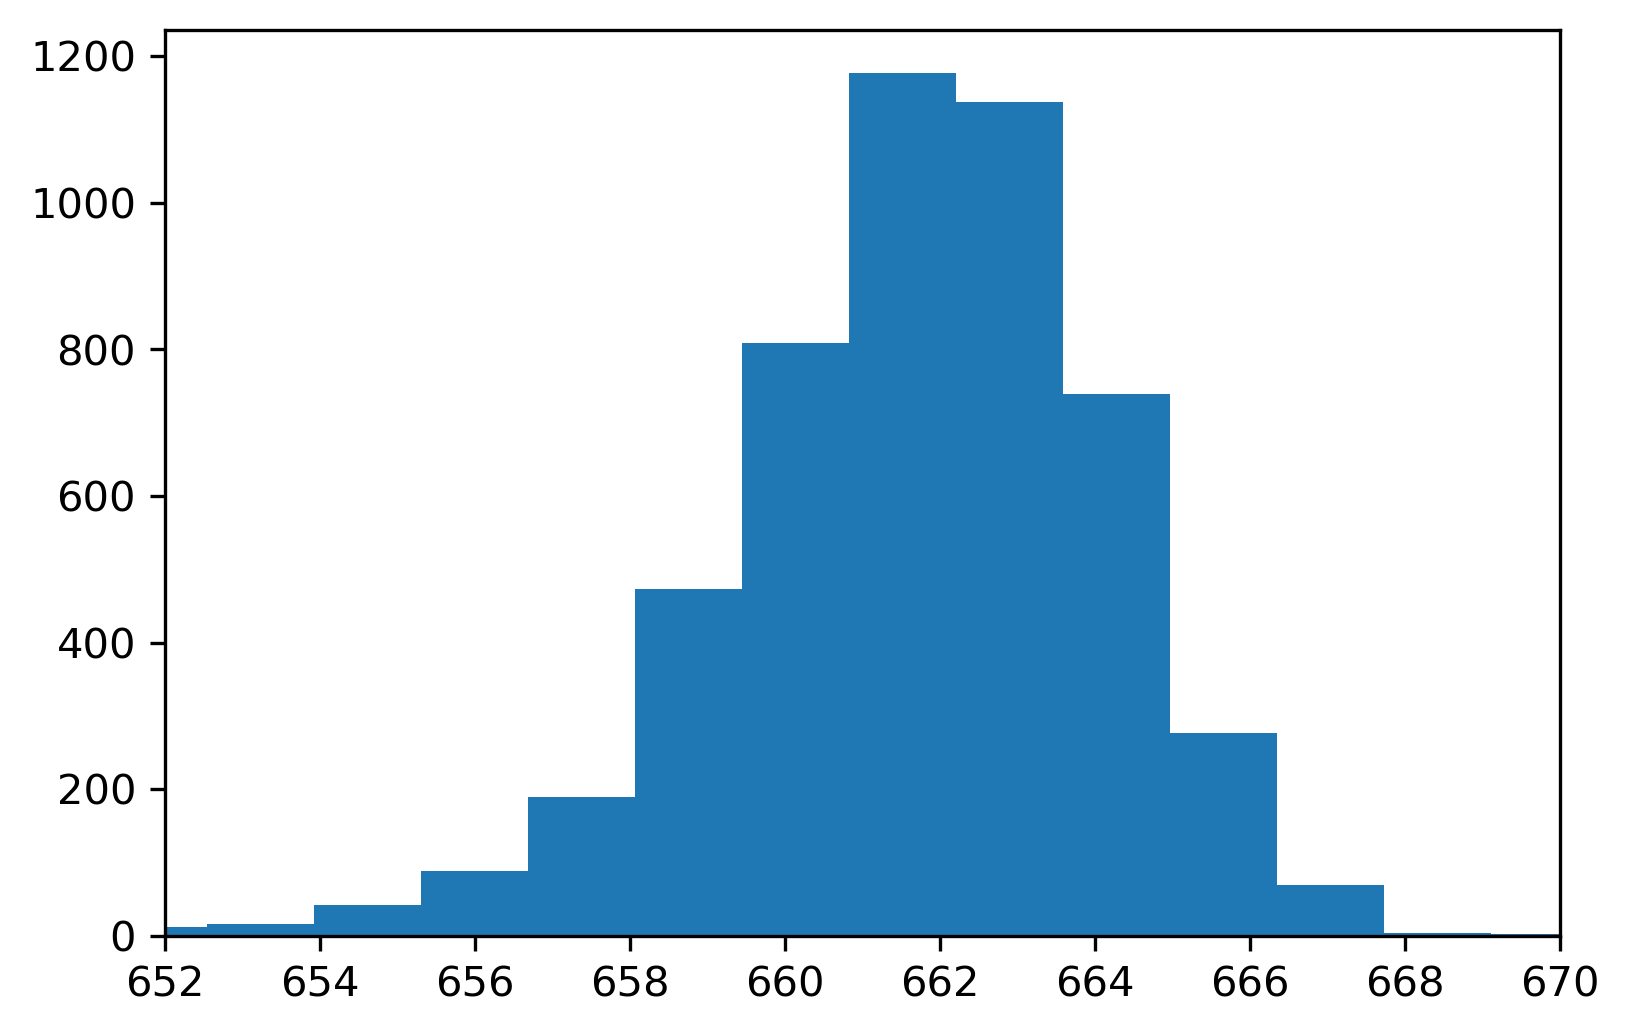

In [27]:
plt.hist(energies, bins=2**11)
plt.xlim(652,670)
plt.show()

In [7]:
rise_times = []
for d in tqdm(data):
    signal = savgol_filter(d[:2500], 51, 0)
    rise_times.append(CFD(signal, 0.9)-CFD(signal, 0.1))
rise_times = np.array(rise_times)

rise_times_photopeak = []
for i in tqdm(cs_photopeak_inds):
    signal = savgol_filter(data[i[0]][:2500], 51, 0)
    rise_times_photopeak.append(CFD(signal, 0.9)-CFD(signal, 0.1))
rise_times_photopeak = np.array(rise_times_photopeak)

  0%|          | 0/16991 [00:00<?, ?it/s]

  0%|          | 0/5028 [00:00<?, ?it/s]

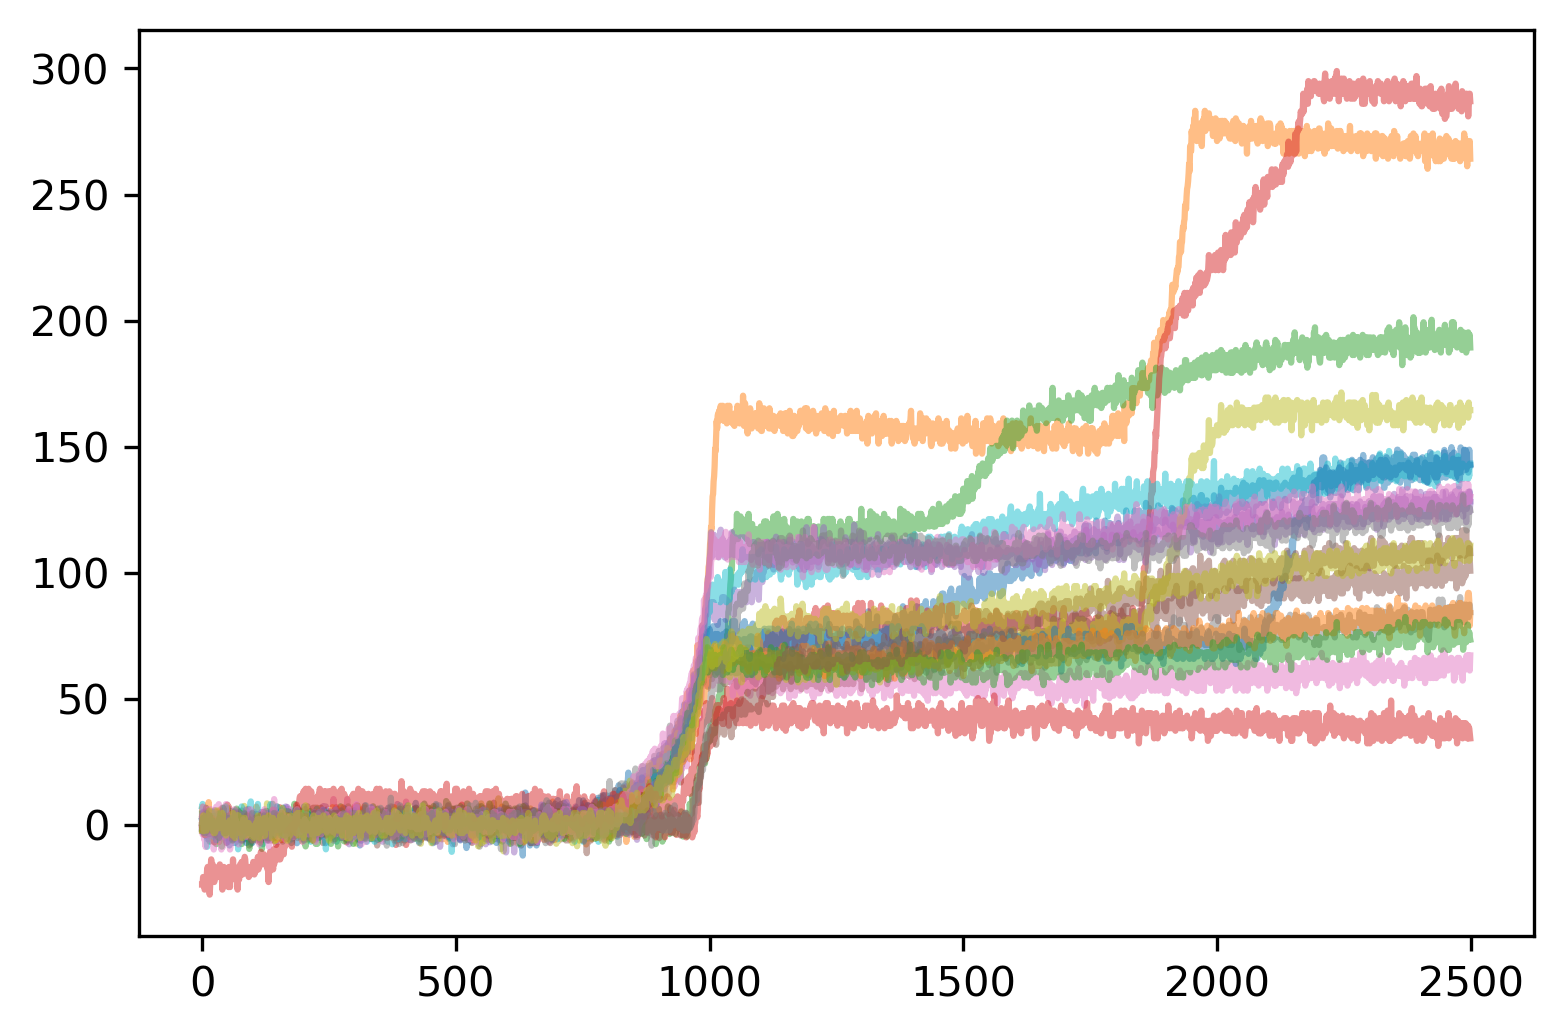

In [61]:
for i in [cs_photopeak_inds[i[0]][0] for i in np.argwhere(rise_times_photopeak > 800)]:
    plt.plot(reset_zero(data[i][:2500]), alpha=0.5)

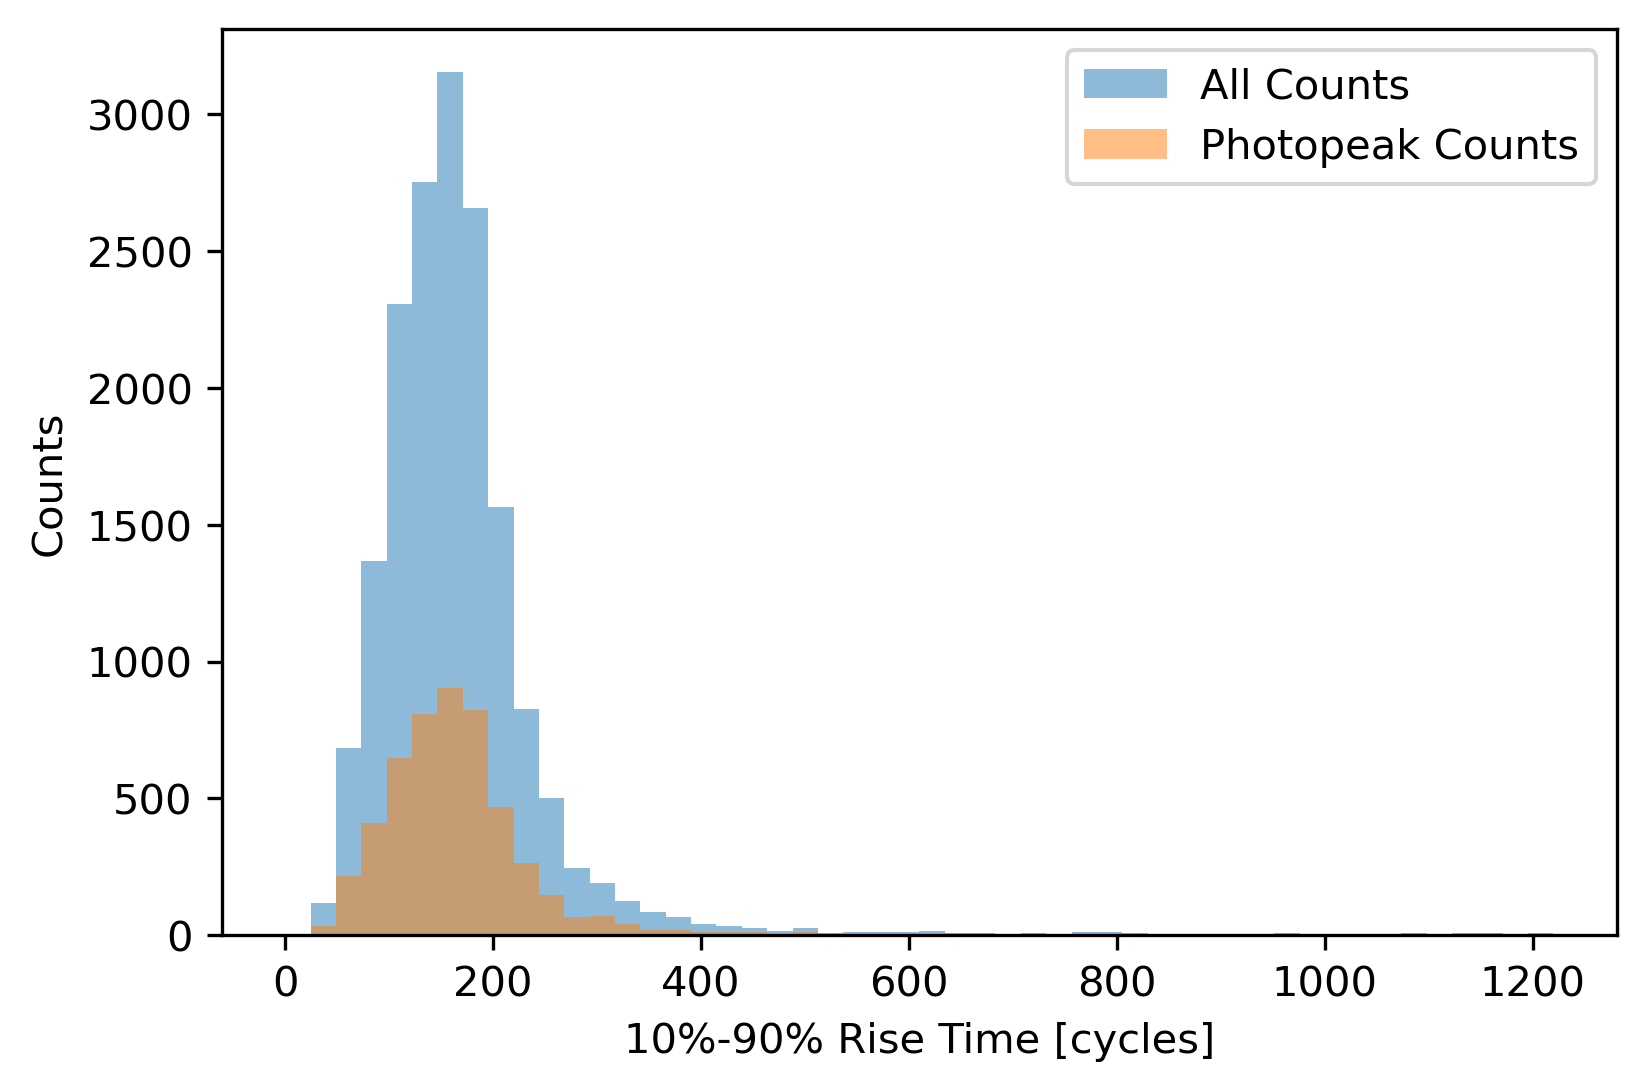

In [8]:
bins = np.linspace(0, 1220, 51)
plt.hist(rise_times, bins=bins, alpha=0.5, label='All Counts')
plt.hist(rise_times_photopeak, bins=bins, alpha=0.5, label='Photopeak Counts')
plt.ylabel('Counts')
plt.xlabel('10%-90% Rise Time [cycles]')
plt.legend()
plt.show()

In [18]:
max(cs_photopeak[701])

8134

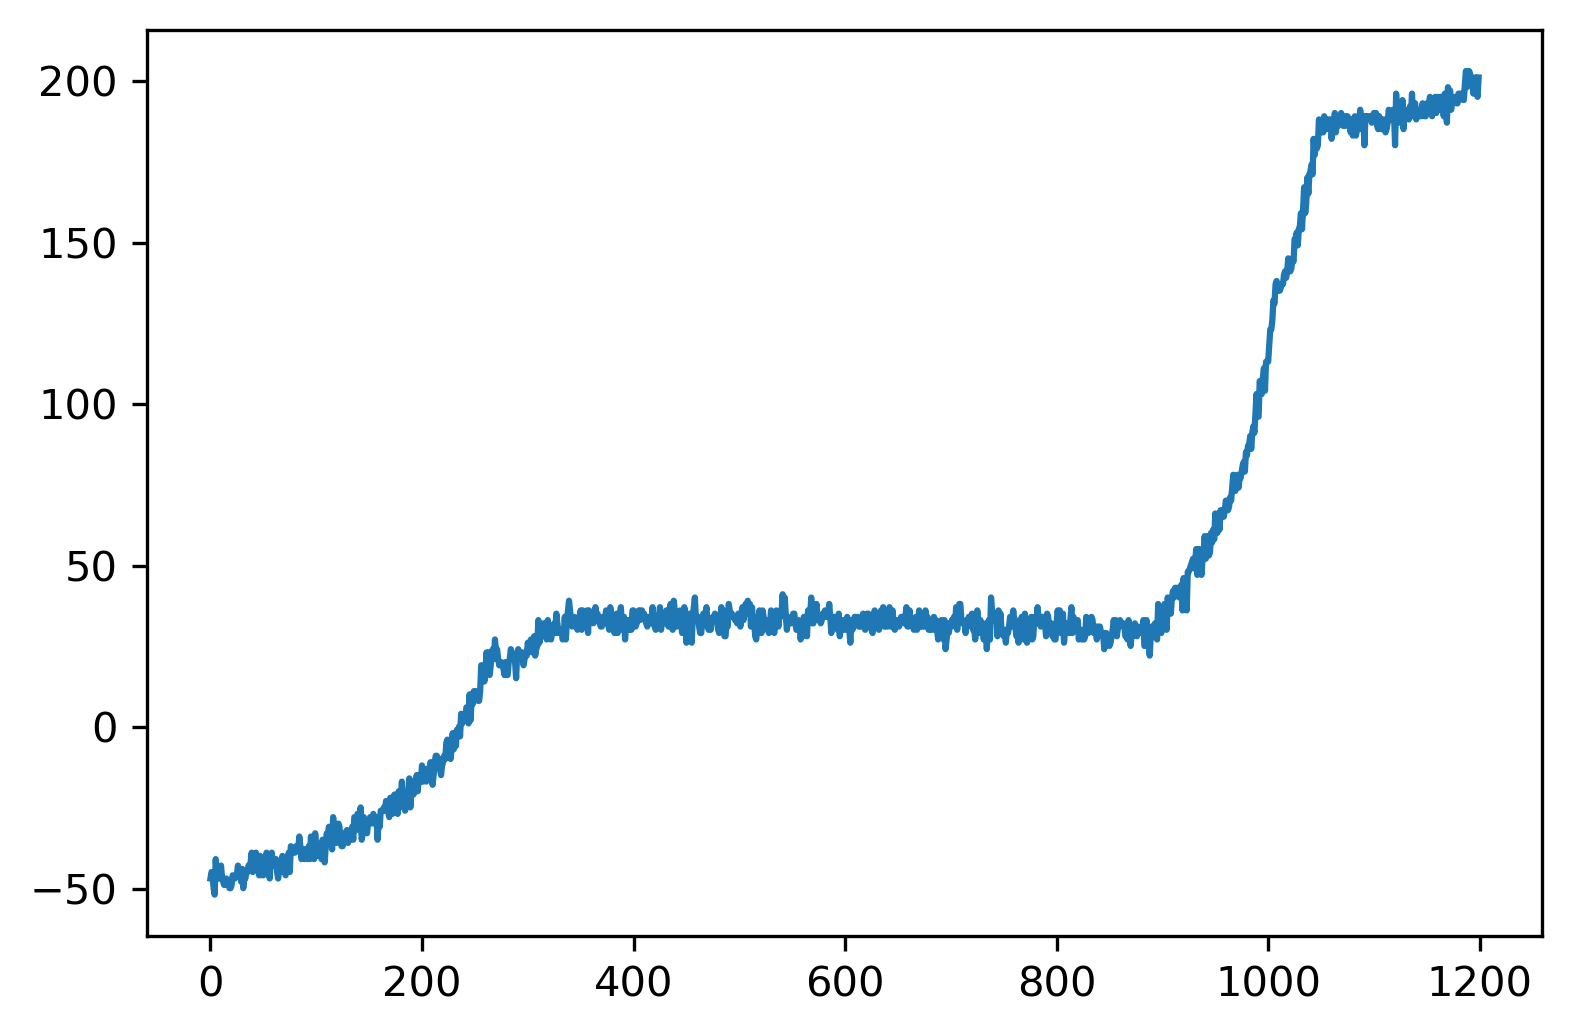

In [24]:
plt.plot(reset_zero(cs_photopeak[p][:1200]))

In [20]:
cs_photopeak_zero, inds = [], []
for p in tqdm(range(len(cs_photopeak))):
    try:
        start = determine_rise(savgol_filter(cs_photopeak[p][:2200], 51, 0))
        #sig = savgol_filter(reset_zero(cs_photopeak[p][start:start+1100]), 51, 0)
        sig = reset_zero(cs_photopeak[p][start:start+1100], samp_size=50)
        cs_photopeak_zero.append(sig/max(sig))
        inds.append(p)
    except:
        pass
inds = np.array(inds)
cs_photopeak_zero = np.array(cs_photopeak_zero)

  0%|          | 0/4800 [00:00<?, ?it/s]

In [36]:
len(cs_photopeak_zero)

4799

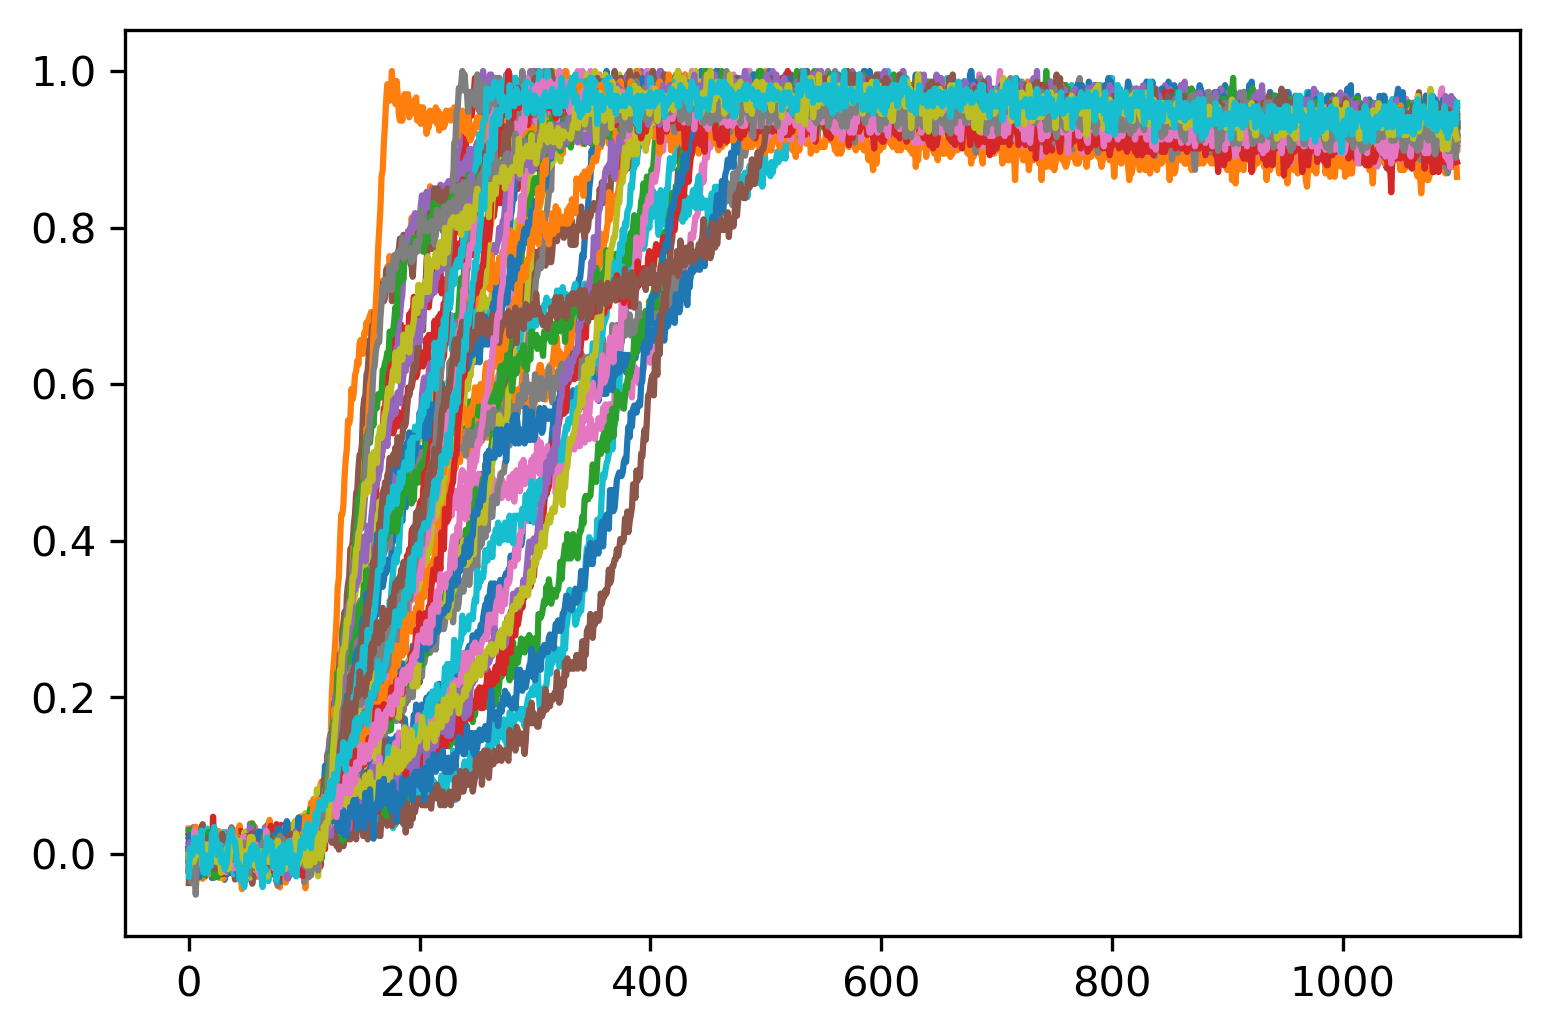

In [21]:
for i in range(50):
    plt.plot(cs_photopeak_zero[i])

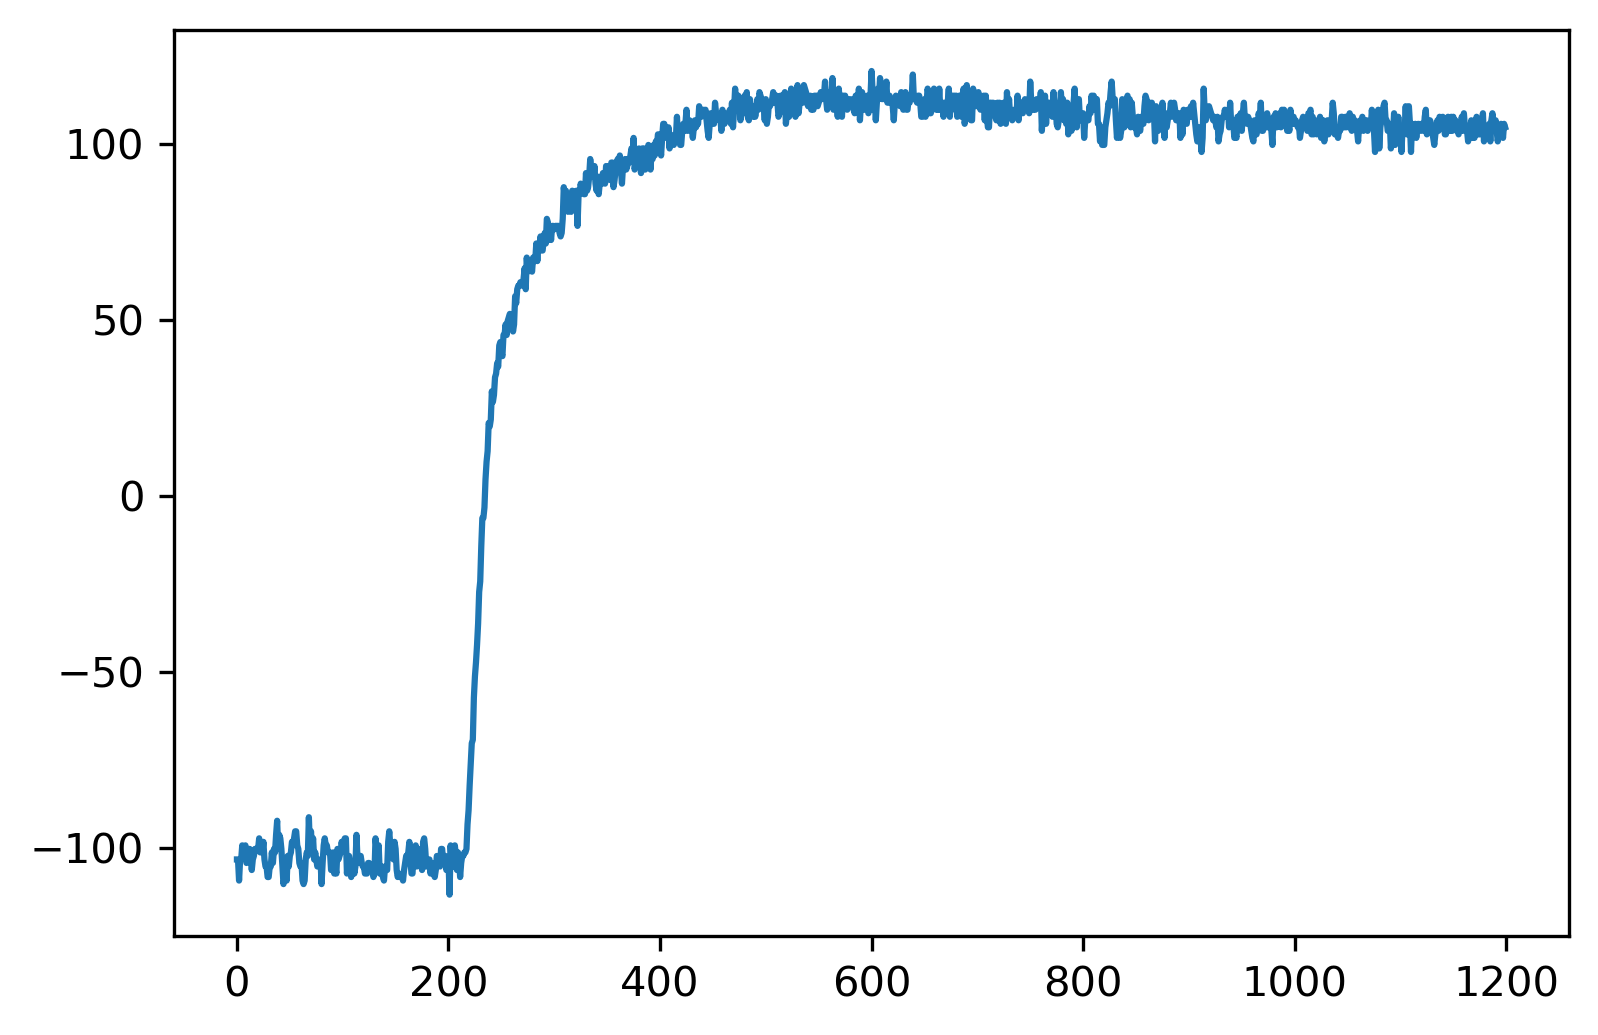

In [21]:
p = 1
start = determine_rise(savgol_filter(cs_photopeak[p][:2200], 51, 0))
plt.plot(reset_zero(cs_photopeak[p][start-100:start+1100]))

In [115]:
kmeans = KMeans(init="random",n_clusters=4, n_init=10,
    max_iter=300,random_state=42)

In [116]:
kmeans.fit(cs_photopeak_zero)

KMeans(init='random', n_clusters=4, random_state=42)

In [118]:
kmeans.cluster_centers_

array([[-6.74297464e-02, -5.23509253e-02, -4.20699109e-02, ...,
         2.07211528e+02,  2.07213585e+02,  2.07318451e+02],
       [-3.37468983e-03,  8.26468156e-02, -4.20181969e-03, ...,
         2.07994971e+02,  2.08006551e+02,  2.07933763e+02],
       [-1.00422741e-01, -3.48250729e-02,  5.99271137e-02, ...,
         2.06393017e+02,  2.06444038e+02,  2.06335437e+02],
       [-2.17847769e-03, -6.91076115e-02, -2.05511811e-02, ...,
         2.08635617e+02,  2.08430892e+02,  2.08629055e+02]])

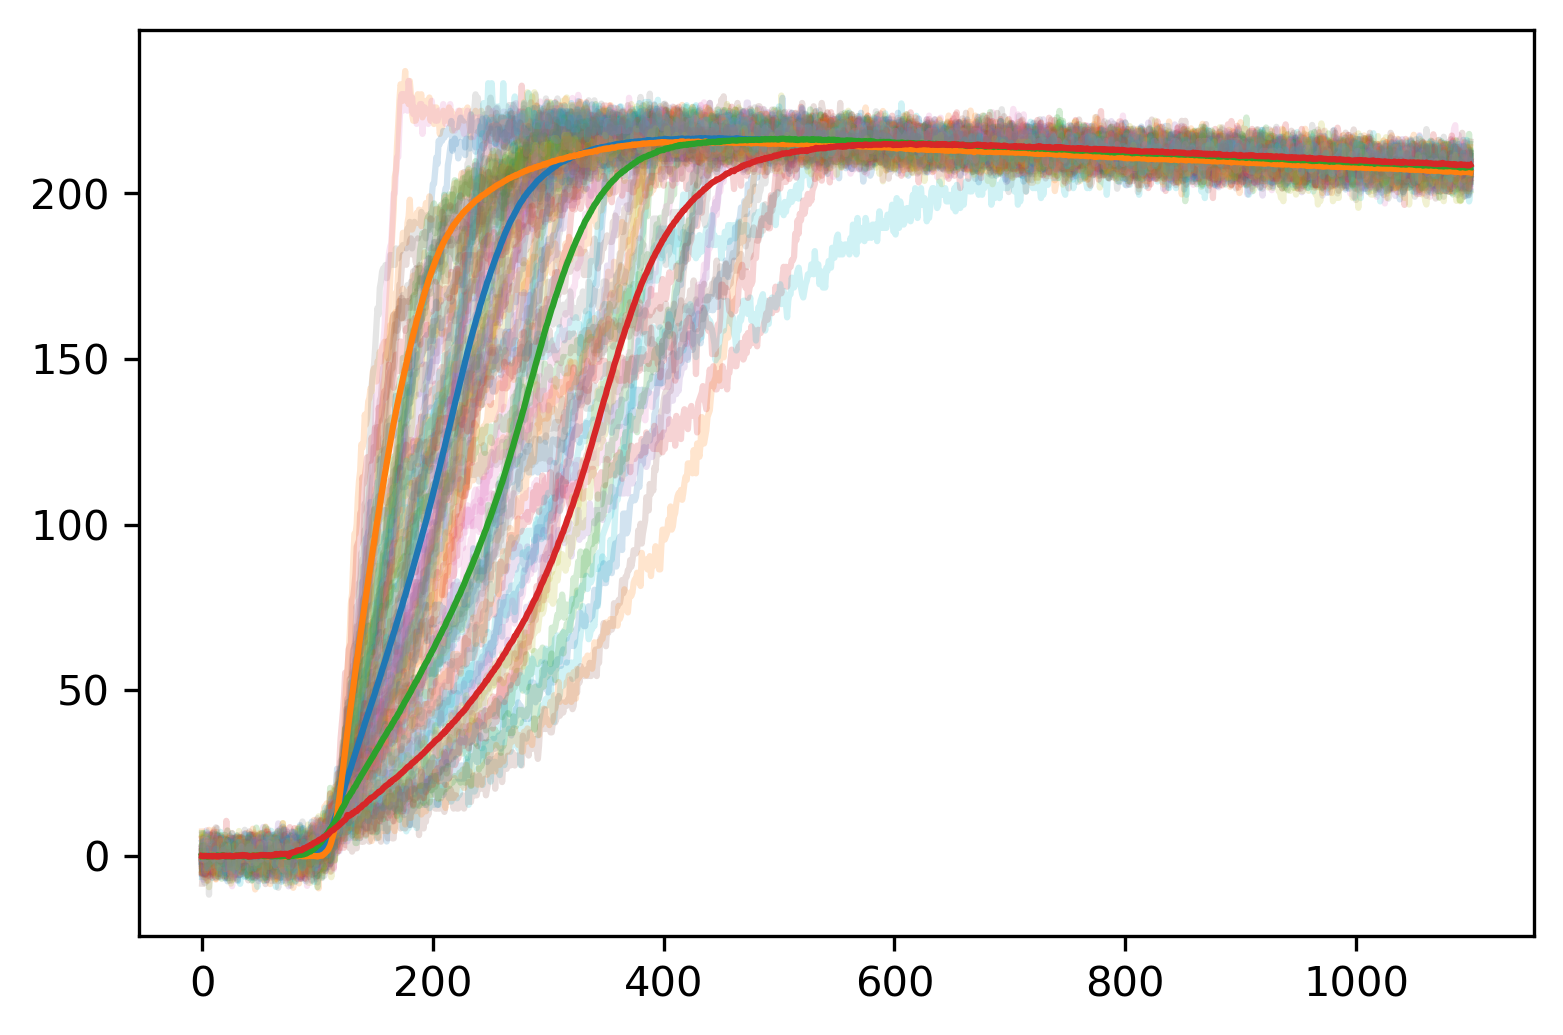

In [22]:
clu = 4
kmeans = KMeans(init="random",n_clusters=clu, n_init=100,
    max_iter=2000,random_state=42)

kmeans.fit(cs_photopeak_zero)

for i in range(100):
    plt.plot(cs_photopeak_zero[i], alpha=0.2)

for k in range(clu):
    plt.plot(kmeans.cluster_centers_[k])

In [76]:
kmeans.labels_

array([1, 2, 0, ..., 2, 0, 2], dtype=int32)

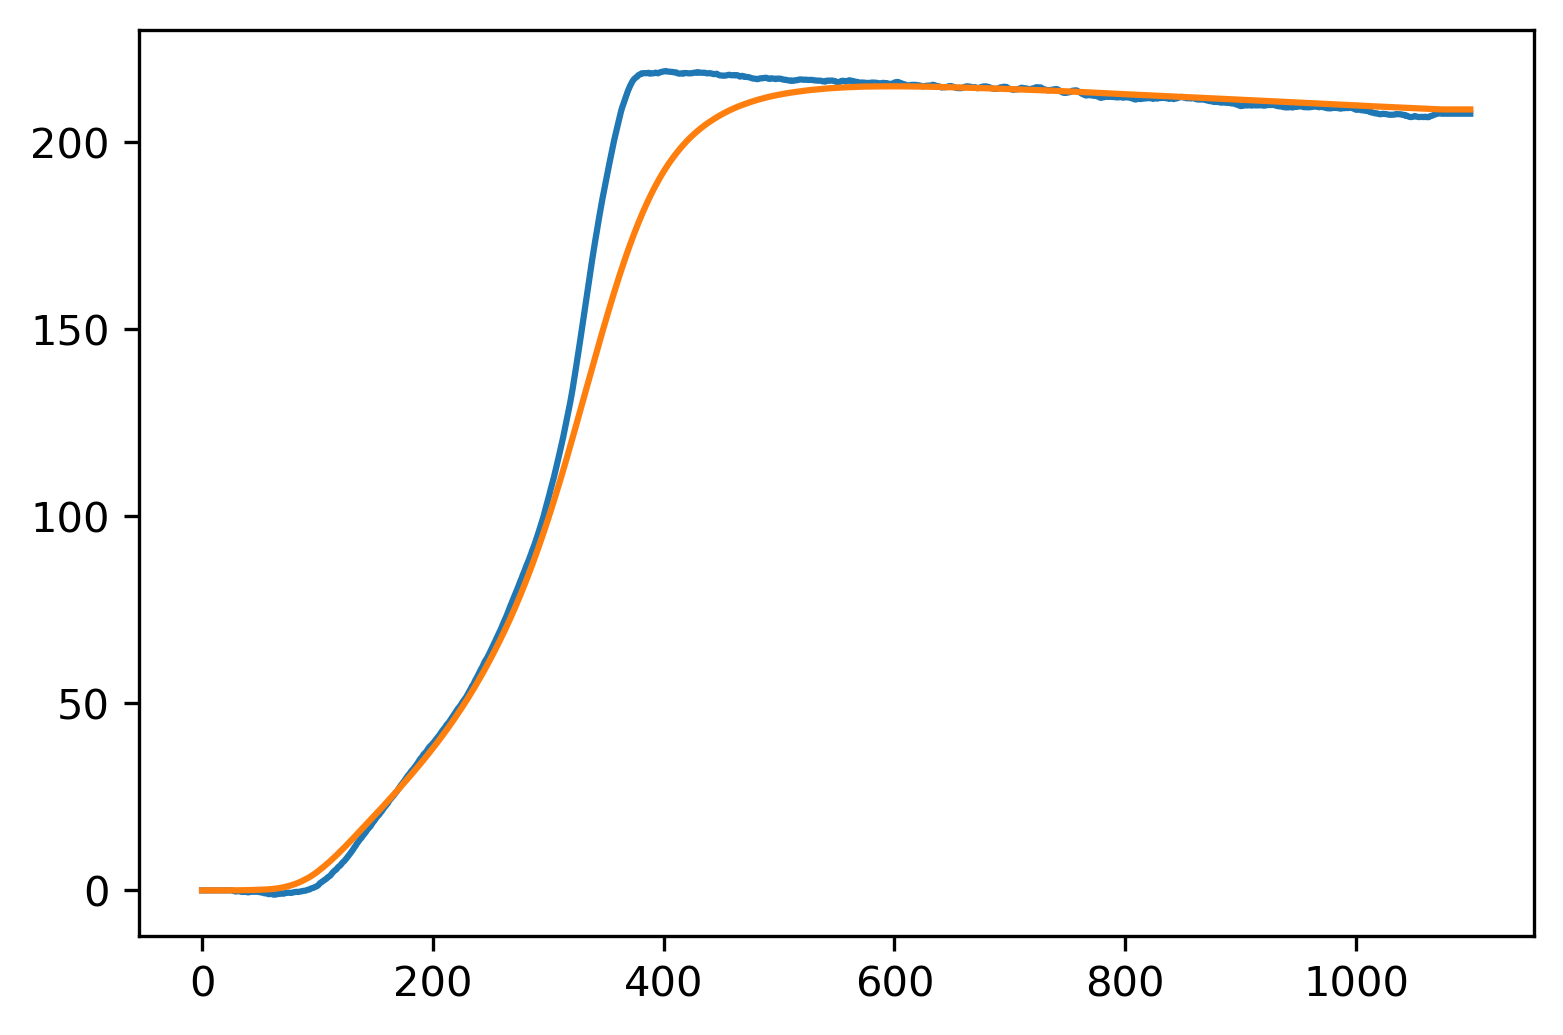

In [79]:
plt.plot(cs_photopeak_zero[0])
plt.plot(kmeans.cluster_centers_[1])

In [103]:
kmeans_kwargs = {"init": "random", "n_init": 100, "max_iter": 2000}

sse = []
for k in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cs_photopeak_zero)
    sse.append(kmeans.inertia_)

  0%|          | 0/10 [00:00<?, ?it/s]

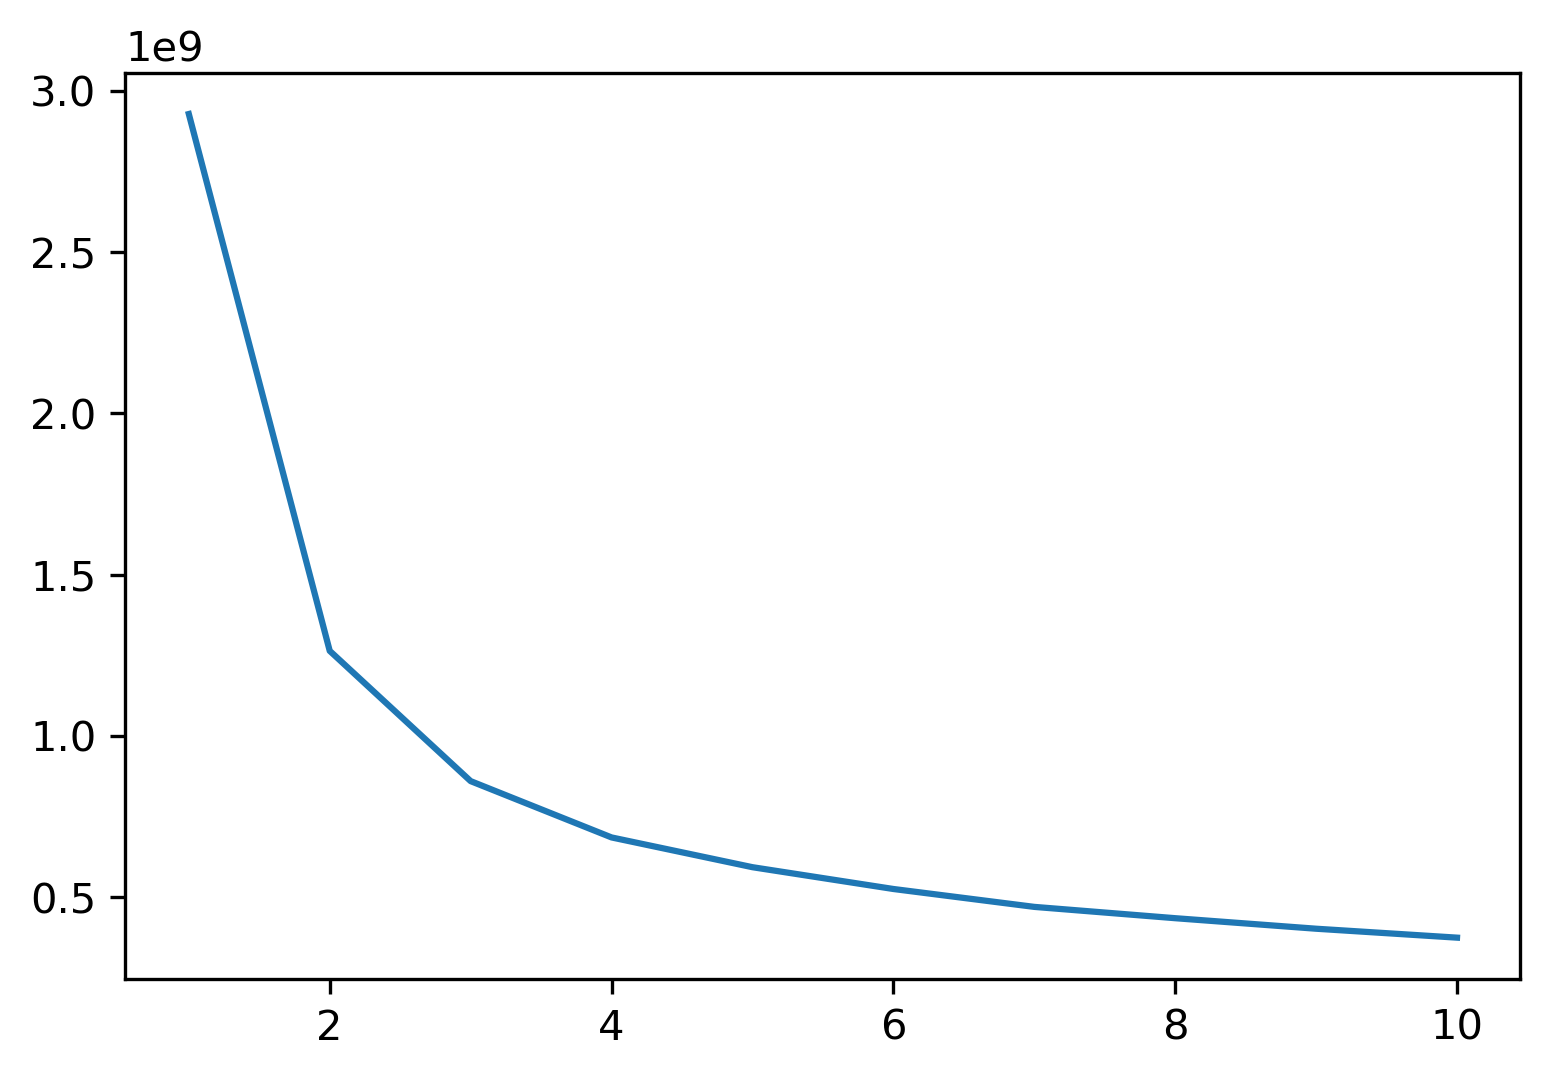

In [105]:
plt.plot(range(1,11), sse)

In [106]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [107]:
kl.knee

3

In [113]:
silhouette_coefficients = []

for k in tqdm(range(2, 11)):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cs_photopeak_zero)
    score = silhouette_score(cs_photopeak_zero, kmeans.labels_)
    silhouette_coefficients.append(score)

  0%|          | 0/9 [00:00<?, ?it/s]

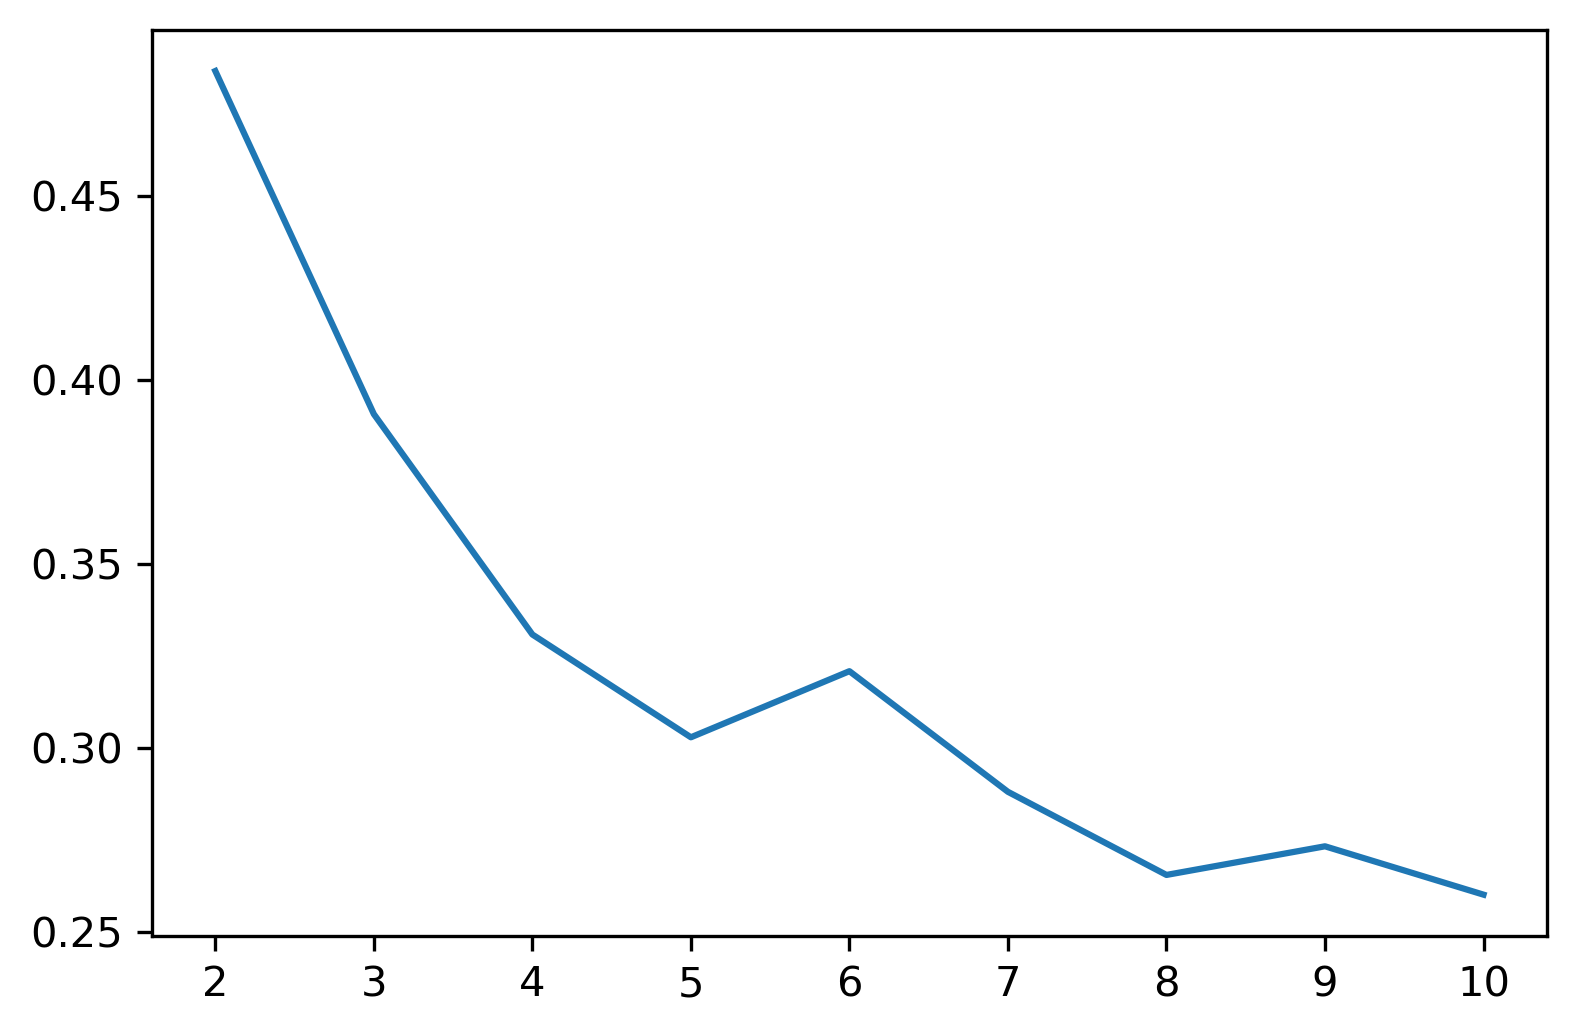

In [114]:
plt.plot(range(2,11), silhouette_coefficients)

In [39]:
n = 15
gmm = GaussianMixture(n_components=n, n_init=10, init_params='kmeans') #init_params='k-means++'
gmm.fit(cs_photopeak_zero)

kmeans = KMeans(init="random",n_clusters=n, n_init=100,
    max_iter=2000,random_state=42)

kmeans.fit(cs_photopeak_zero)

KMeans(init='random', max_iter=2000, n_clusters=15, n_init=100, random_state=42)

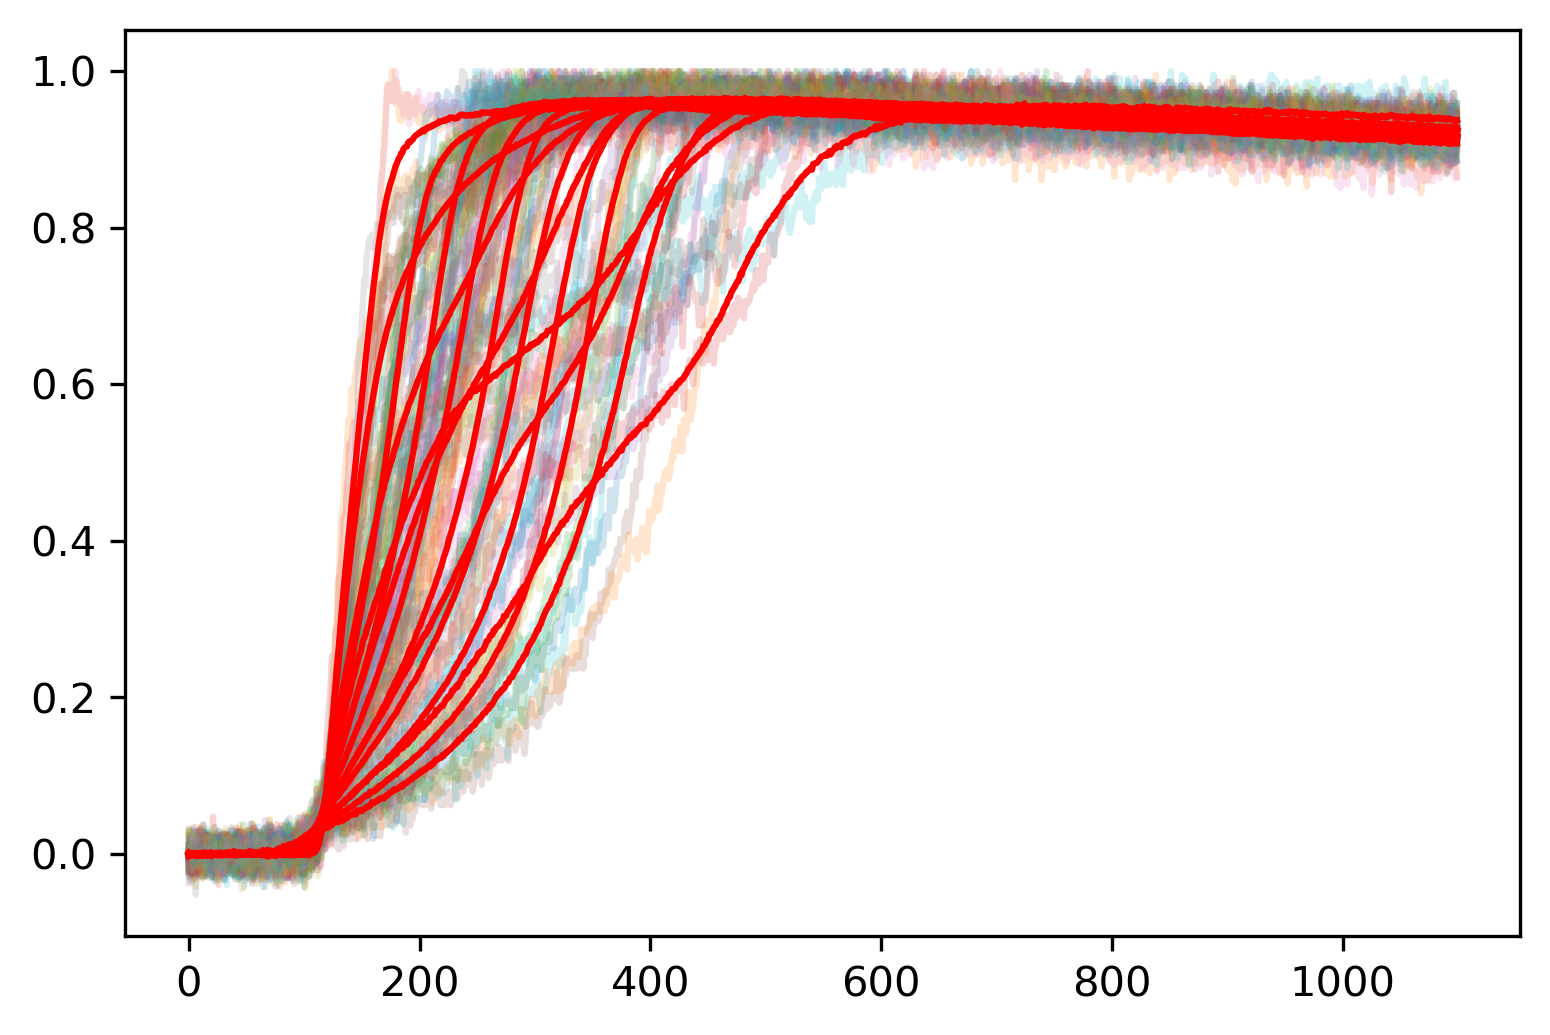

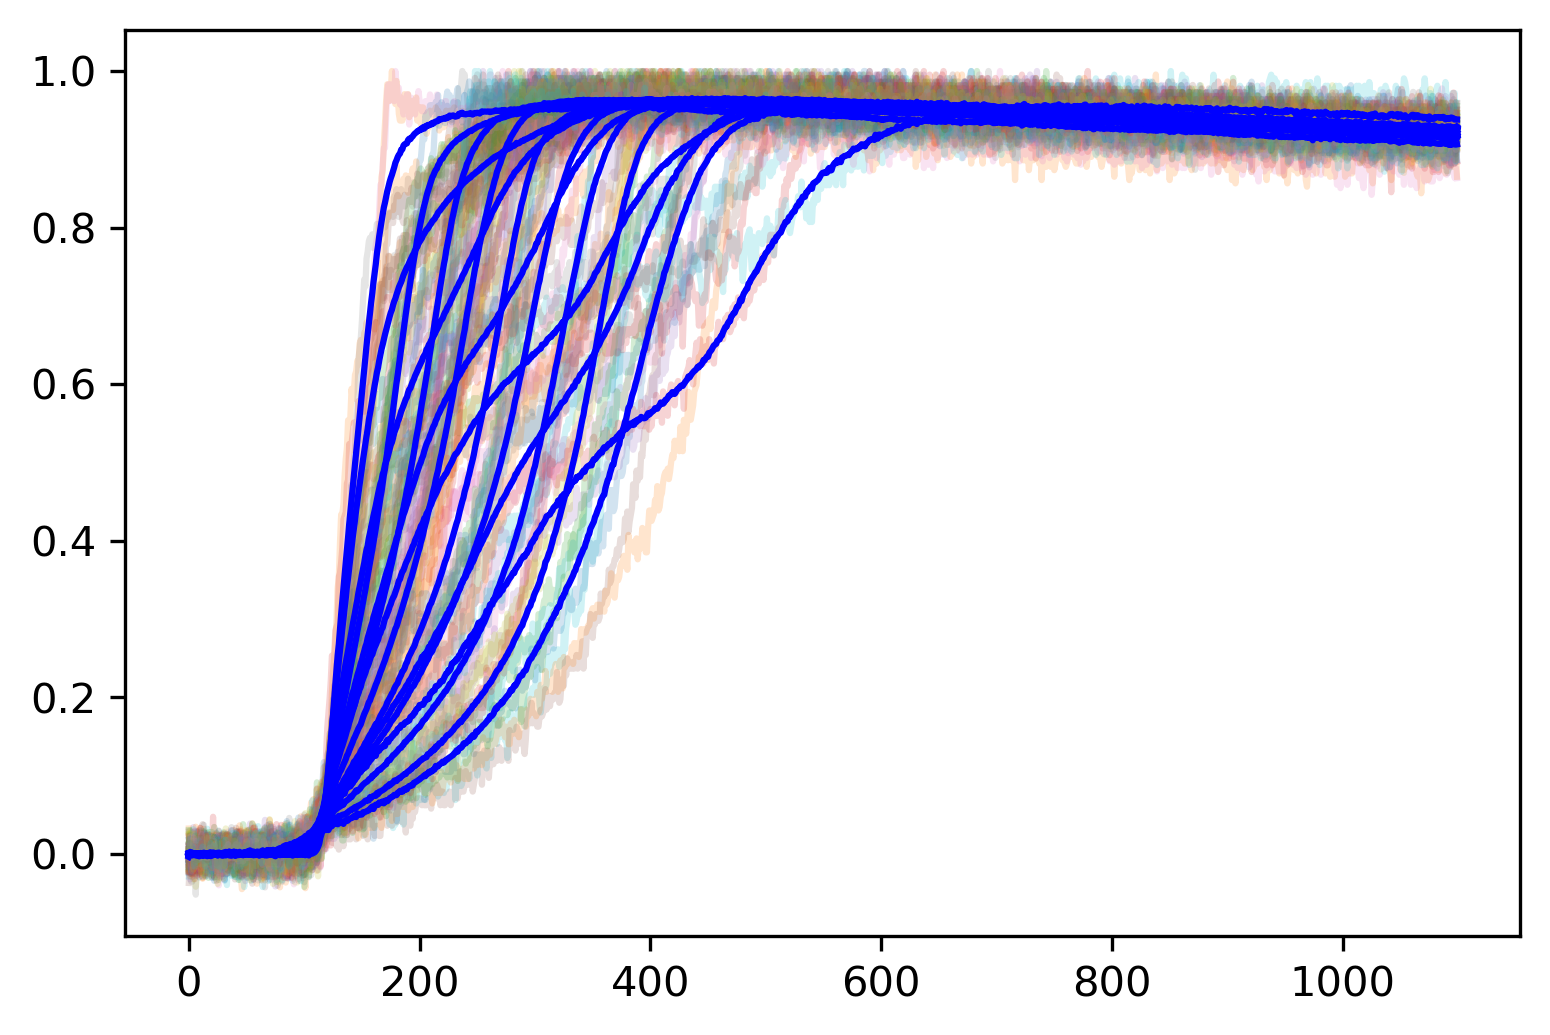

In [46]:
for i in range(100):
    plt.plot(cs_photopeak_zero[i], alpha=0.2)
for k in range(n):
    plt.plot(gmm.means_[k], color='red') #, alpha=0.5)
plt.show()
    
for i in range(100):
    plt.plot(cs_photopeak_zero[i], alpha=0.2)
for k in range(n):
    plt.plot(kmeans.cluster_centers_[k], color='blue') #, alpha=0.5)
    
plt.show()

Text(0.5, 1.0, '15 Clusters\nRed = Gaussian Mixture\nBlue = K Means')

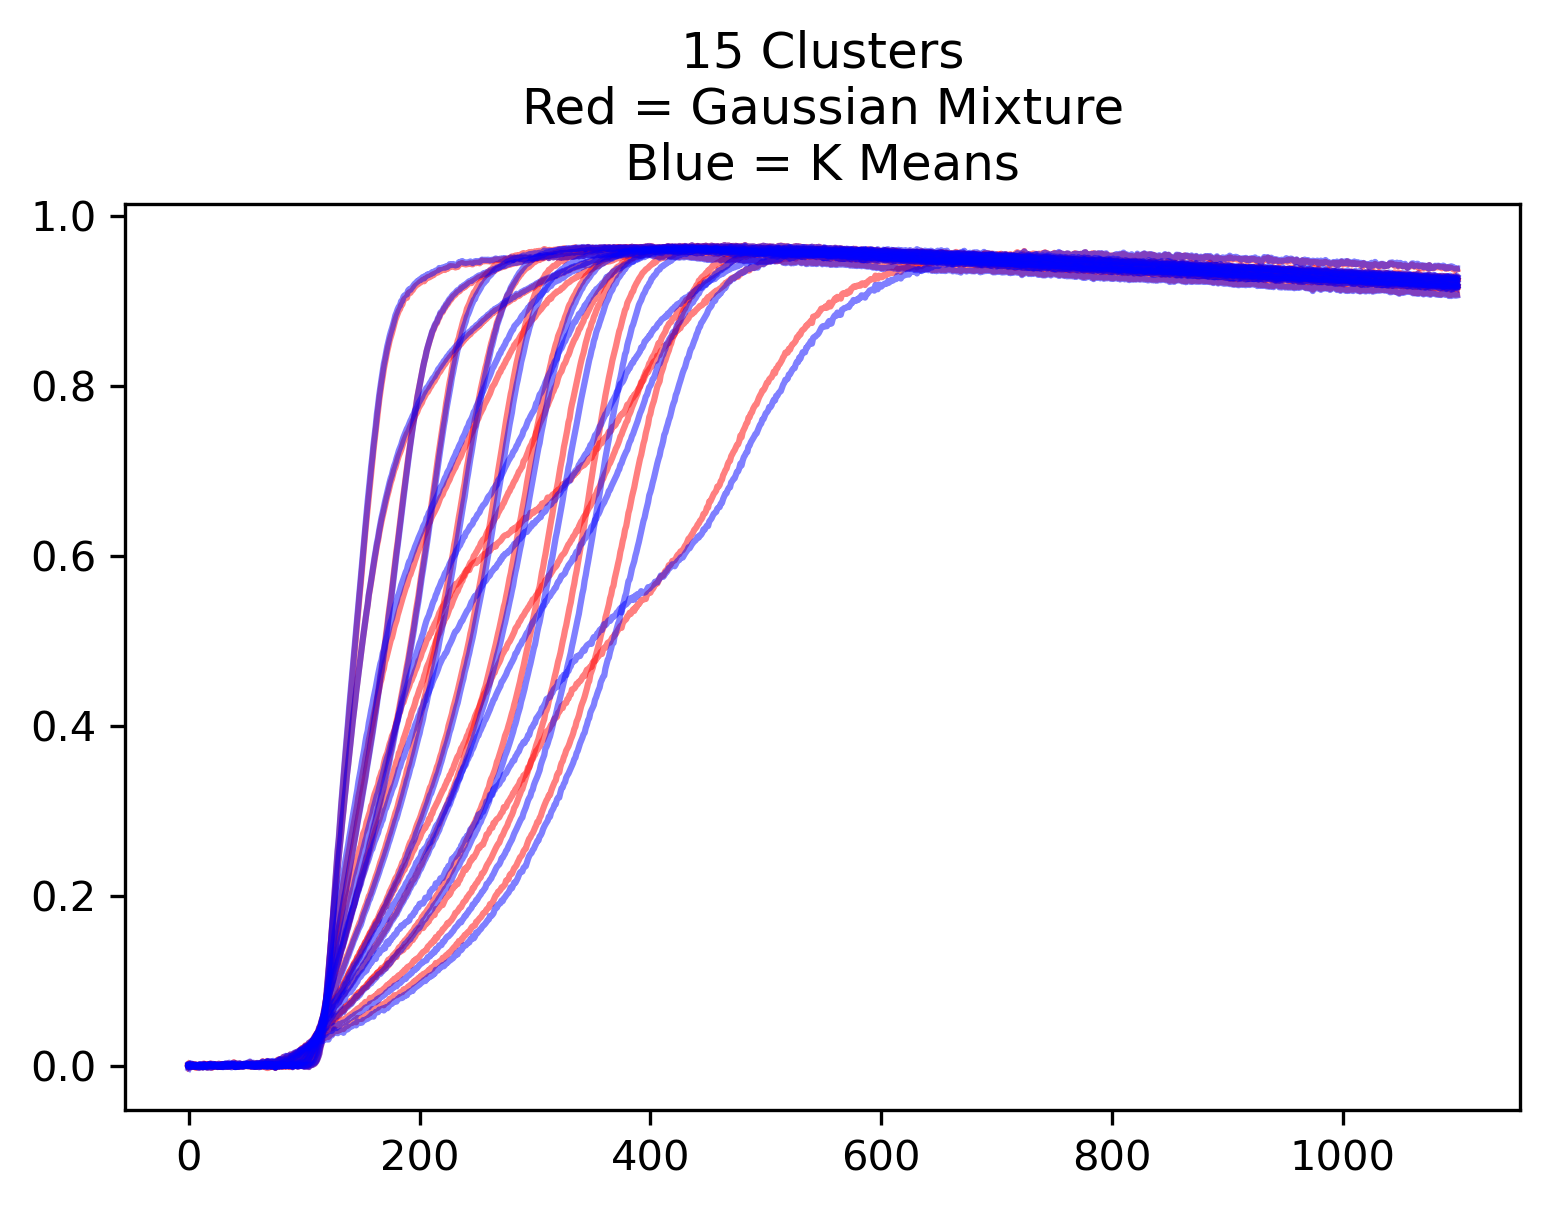

In [43]:
for k in range(n):
    plt.plot(gmm.means_[k], color='red', alpha=0.5)
for k in range(n):
    plt.plot(kmeans.cluster_centers_[k], color='blue', alpha=0.5)
plt.title('{} Clusters\nRed = Gaussian Mixture\nBlue = K Means'.format(n))

In [45]:
gmm.converged_

True

In [29]:
rise_times = []
for pp in range(len(cs_photopeak_zero)):
    signal = savgol_filter(cs_photopeak_zero[pp], 31, 0)
    rise_times.append(CFD(signal, 0.9, samp_size=50)-CFD(signal, 0.1, samp_size=50))

In [8]:
n = 250
kmeans = KMeans(init="random",n_clusters=n, n_init=10,
    max_iter=2000,random_state=42)

kmeans.fit(cs_photopeak_zero)

KMeans(init='random', max_iter=2000, n_clusters=250, random_state=42)

In [124]:
def cluster_data(data, n_clust, buff=50, quality=True):
    kmeans = KMeans(init='random', n_clusters=n_clust, n_init=10, max_iter=2000, random_state=int(time.time()))
    kmeans.fit(data)
    
    clusts = kmeans.labels_
    
    rise_times = []
    for pp in range(len(data)):
        signal = savgol_filter(data[pp], 31, 0)
        rise_times.append([CFD(signal, 0.1, samp_size=50), CFD(signal, 0.9, samp_size=50)])
    
    # Attempting FOM creation
    if quality:
        avg_err = []
        for i in range(len(clusts)):
            weight = np.zeros(len(cs_photopeak_zero[i]))
            weight[rise_times[i][0]:rise_times[i][1]+buff] = np.ones((rise_times[i][1]+buff)-(rise_times[i][0]))
            weight = weight/sum(weight)
            #sst = np.cumsum(np.square(data[i]-np.mean(data[i])))[-1]
            val = weight*np.abs((data[i]-kmeans.cluster_centers_[kmeans.labels_[i]])/kmeans.cluster_centers_[kmeans.labels_[i]])
            #sse = np.cumsum(np.square(data[i]-kmeans.cluster_centers_[kmeans.labels_[i]])/kmeans.cluster_centers_[kmeans.labels_[i]])[-1]
            avg_err.append(np.mean(val))

        return np.array(avg_err)
    else:
        return kmeans

In [126]:
kmeans_avg_values_fine = []
for n in tqdm(range(2, 102, 1)):
    kmeans_avg_values_fine.append(cluster_data(cs_photopeak_zero, n, quality=True))
    
kmeans_avg_values_coarse = []
for n in tqdm(range(2, 312, 10)):
    kmeans_avg_values_coarse.append(cluster_data(cs_photopeak_zero, n, quality=True))

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

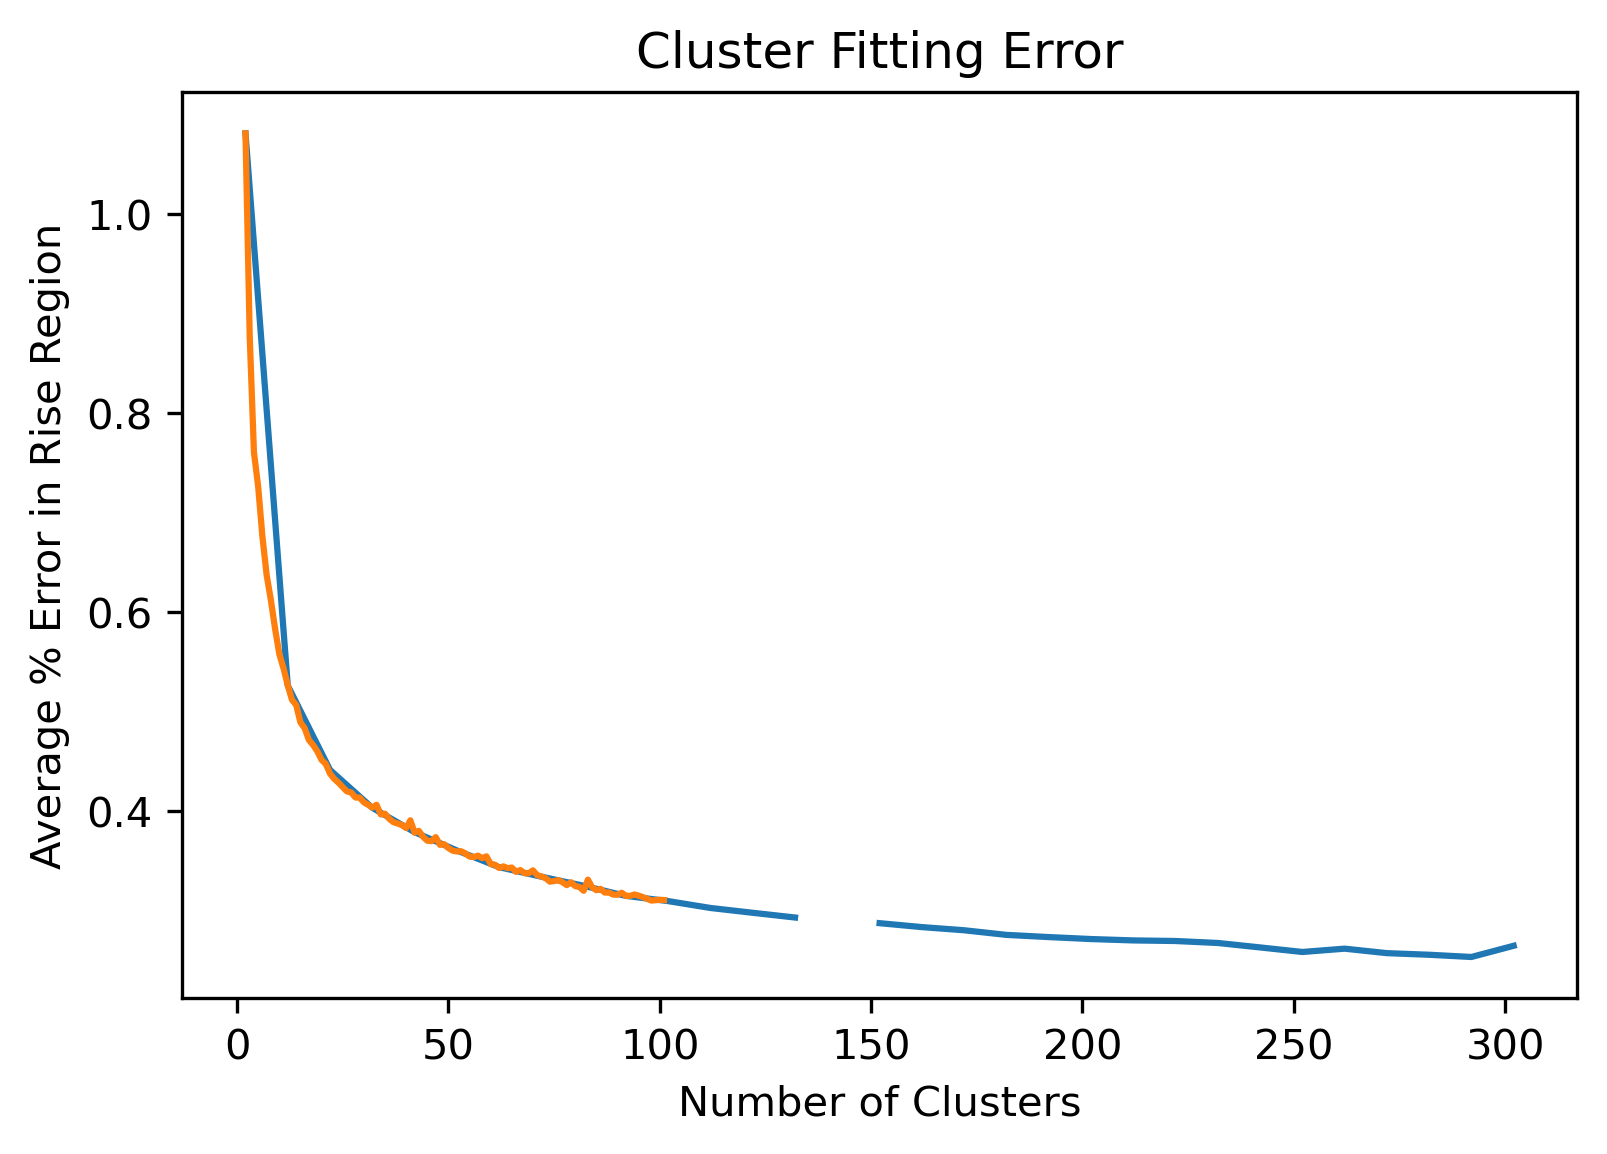

In [133]:
plt.plot(range(2, 312, 10), np.array(kmeans_avg_values_coarse).sum(1))
plt.plot(range(2, 102, 1), np.array(kmeans_avg_values_fine).sum(1))
plt.xlabel('Number of Clusters')
plt.ylabel('Average % Error in Rise Region')
plt.title('Cluster Fitting Error')
plt.savefig('Plots/cluster_fitting_error.png', bbox_inches='tight', facecolor='white', dpi=300)
plt.show()

In [40]:
n = 20
kmeans = cluster_data(cs_photopeak_zero, n)

  0%|          | 0/250 [00:00<?, ?it/s]

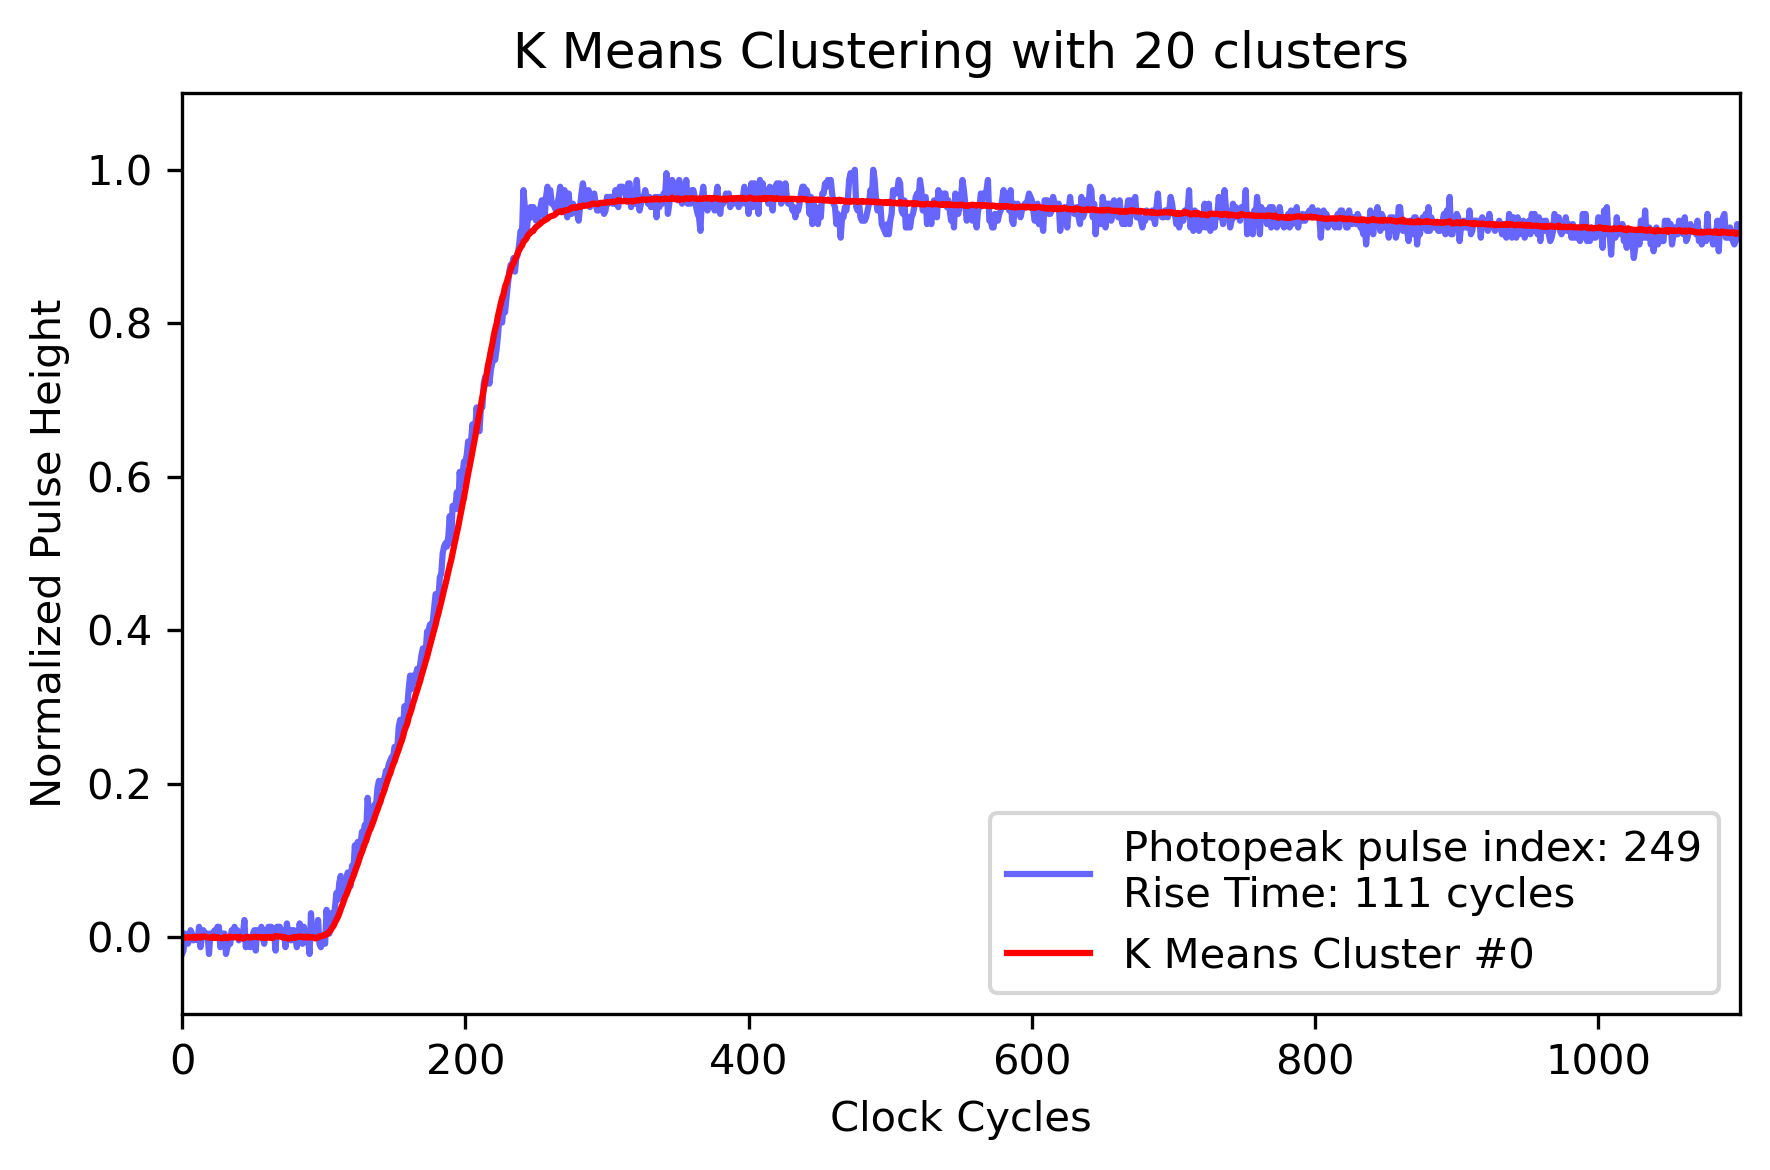

In [41]:
fig = plt.figure(dpi=300)
ax = fig.gca()

legend = ax.legend([''])

pulse = ax.plot([], [], color='blue', alpha=0.6)
mean = ax.plot([], [], color='red')

plots = [pulse, mean]

def init_plot():
    # Chemical Spectra subplot init
    ax.set_xlim(0, len(cs_photopeak_zero[0]))
    ax.set_ylim(-0.1, np.max(cs_photopeak_zero)+0.1)
    ax.set_xlabel('Clock Cycles')
    ax.set_ylabel('Normalized Pulse Height')
    ax.set_title('K Means Clustering with {} clusters'.format(n))
    #ax.xaxis.set_minor_locator(MultipleLocator(10))
    #ax.grid(which='major')
    #ax.grid(which='minor', linestyle='--', alpha=0.2)
    #ax.set_aspect('auto')
    fig.tight_layout()
    return plots

def animate(fr, legend, photopeak, kmeans, rise_times):
    #print(plots[0][0])
    plots[0][0].set_data(np.arange(len(photopeak[fr])), photopeak[fr])
    plots[0][0].set_label('Photopeak pulse index: {}\nRise Time: {} cycles'.format(fr, rise_times[fr]))
    
    plots[1][0].set_data(np.arange(len(kmeans.cluster_centers_[kmeans.labels_[fr]])), kmeans.cluster_centers_[kmeans.labels_[fr]])
    plots[1][0].set_label('K Means Cluster #{}'.format(kmeans.labels_[fr]))
    
    legend.remove()
    legend = ax.legend(loc='lower right', fontsize=10)
    
    return plots + [legend]
    
metadata = dict(title='K Means Animation', artist='Chris Lamb', comment='Just interact in the same place')

frames = 250
fps = 5

ani = animation.FuncAnimation(fig, animate, init_func=init_plot, frames=tqdm(range(frames), leave=True),
                                  fargs=(legend, cs_photopeak_zero, kmeans, rise_times))
FFwriter = animation.FFMpegWriter(fps=fps, metadata=metadata)
ani.save('Plots/K_means_{}clusters_Cs137_PP.mp4'.format(n), writer=FFwriter)

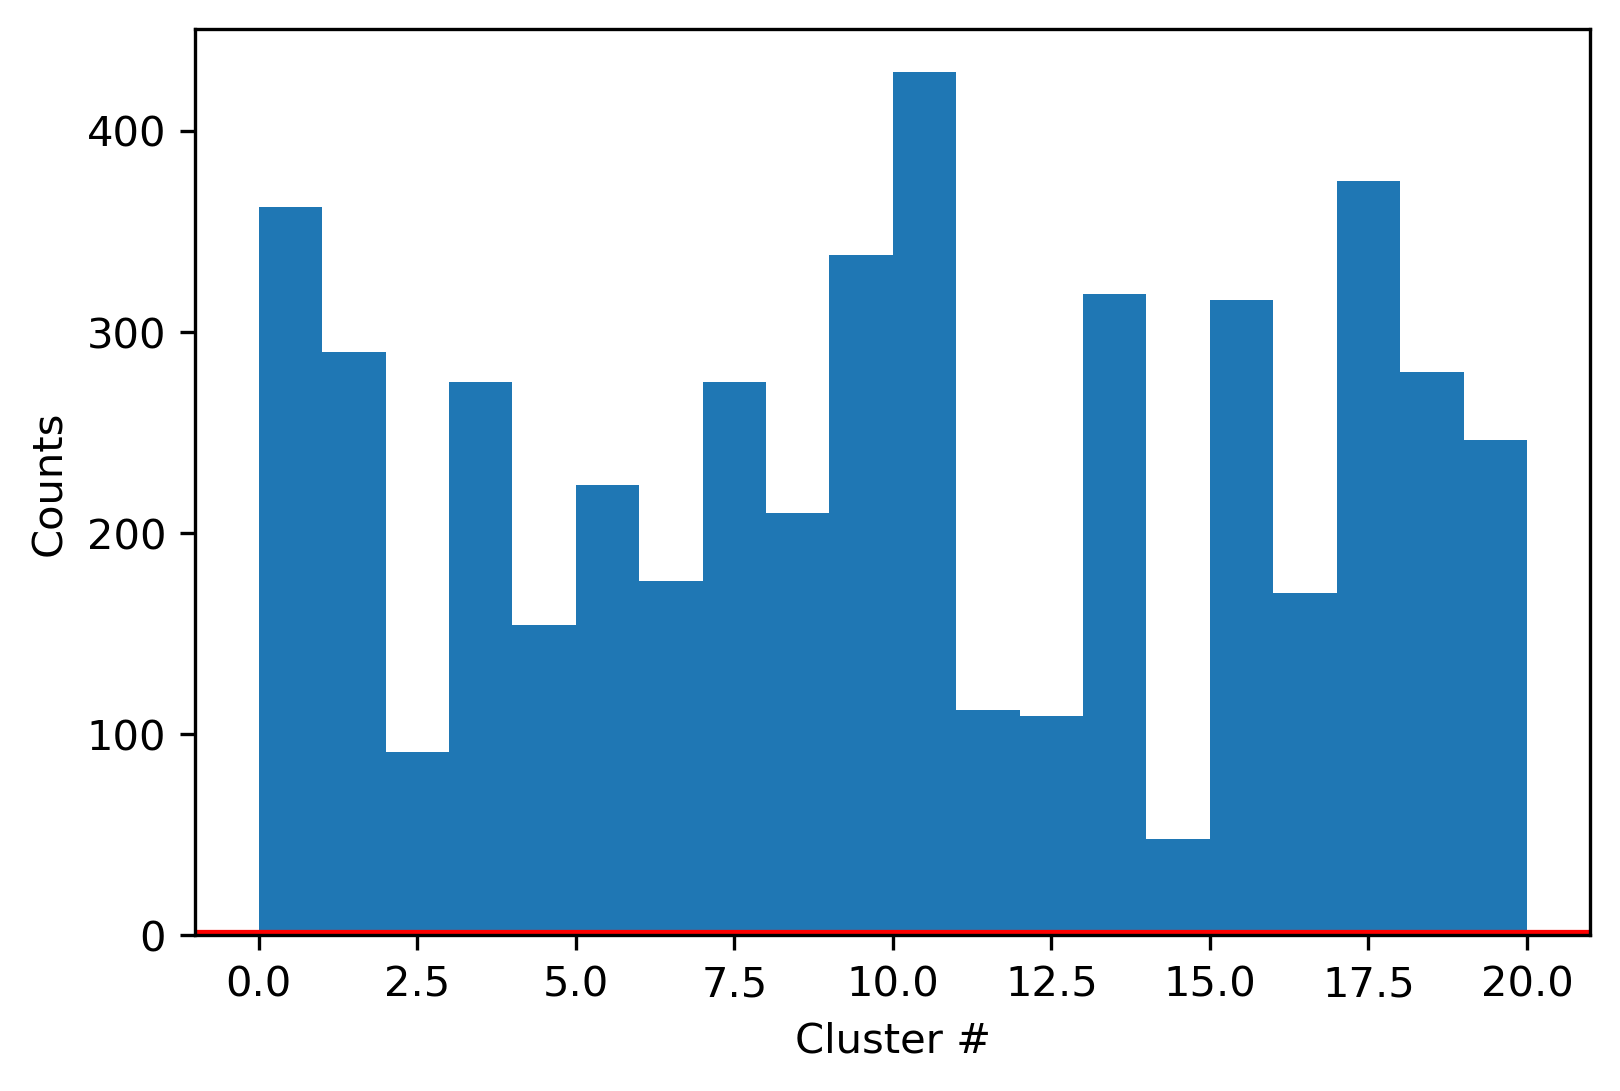

In [42]:
plt.hist(kmeans.labels_, bins=np.arange(n+1))
plt.axhline(1, color='r')
plt.ylabel('Counts')
plt.xlabel('Cluster #')
plt.show()

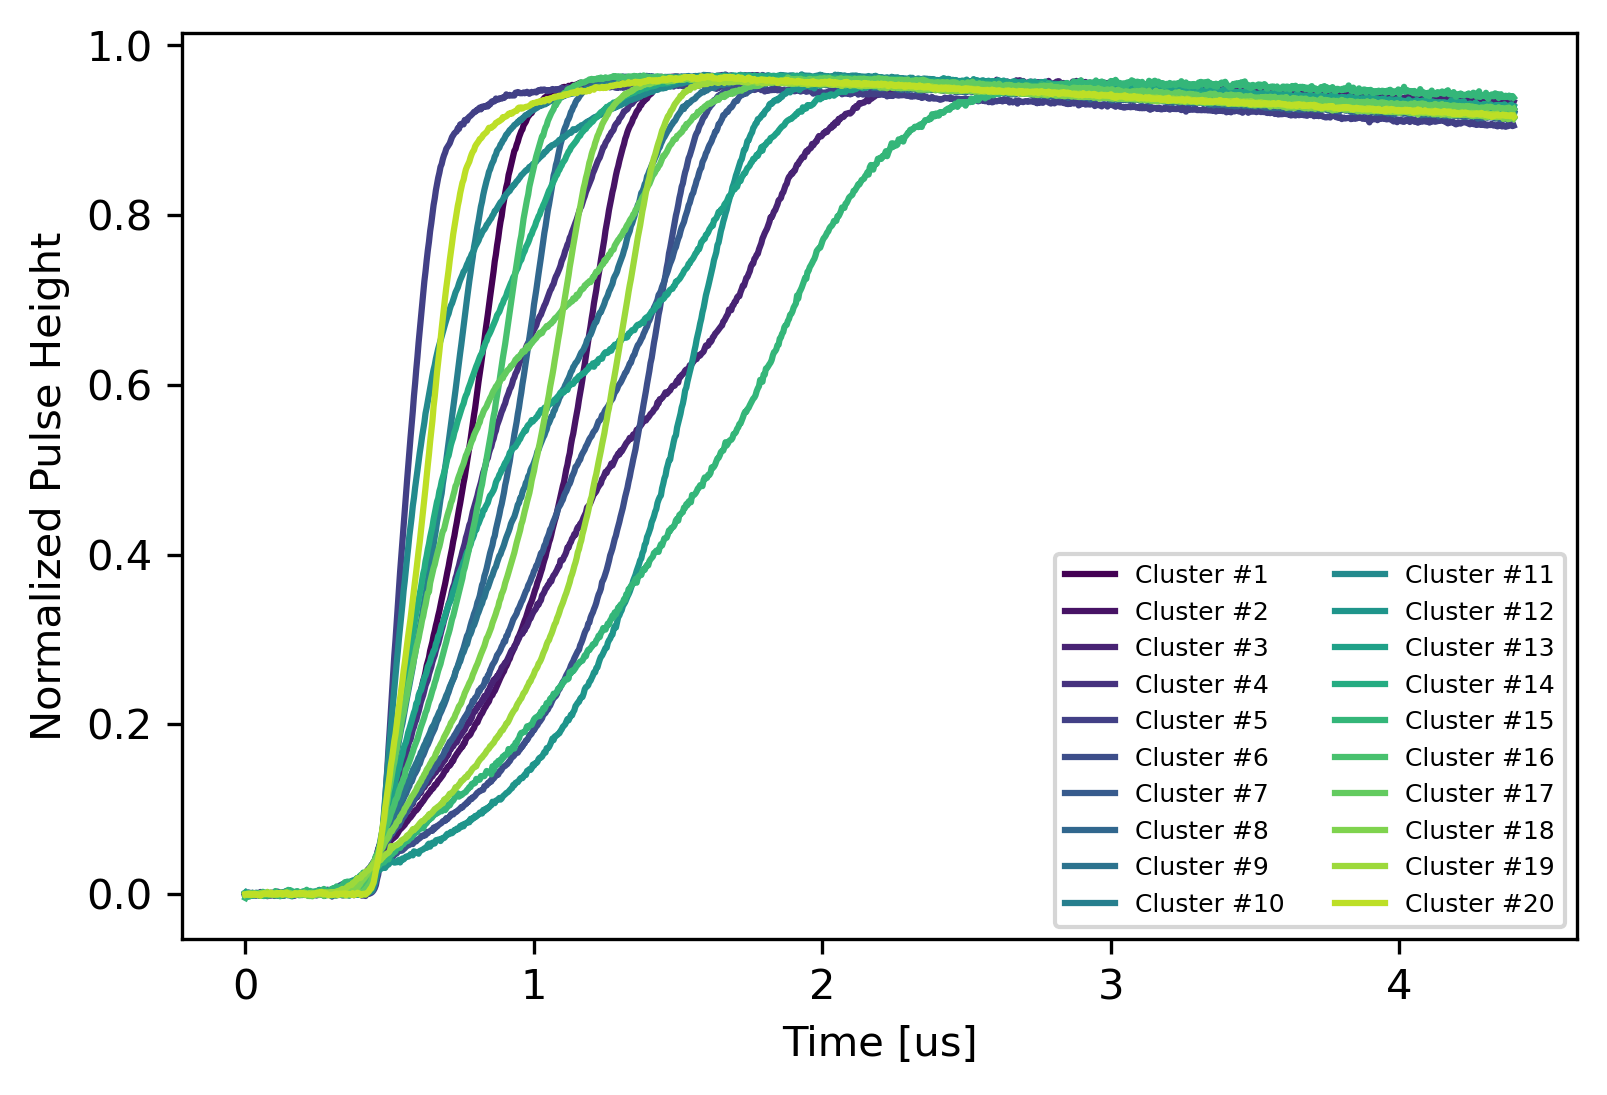

In [66]:
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 0.9, n))

for k in range(n):
    plt.plot(4e-3*np.arange(len(kmeans.cluster_centers_[k])), kmeans.cluster_centers_[k],
             color=colors[k], alpha=1, label='Cluster #{}'.format(k+1))
plt.legend(ncol=2, fontsize=6)
plt.ylabel('Normalized Pulse Height')
plt.xlabel('Time [us]')
plt.show()

In [60]:
rise_times_clust = []
for k in range(n):
    signal = kmeans.cluster_centers_[k]
    rise_times_clust.append(CFD(signal, 0.9, samp_size=50)-CFD(signal, 0.1, samp_size=50))

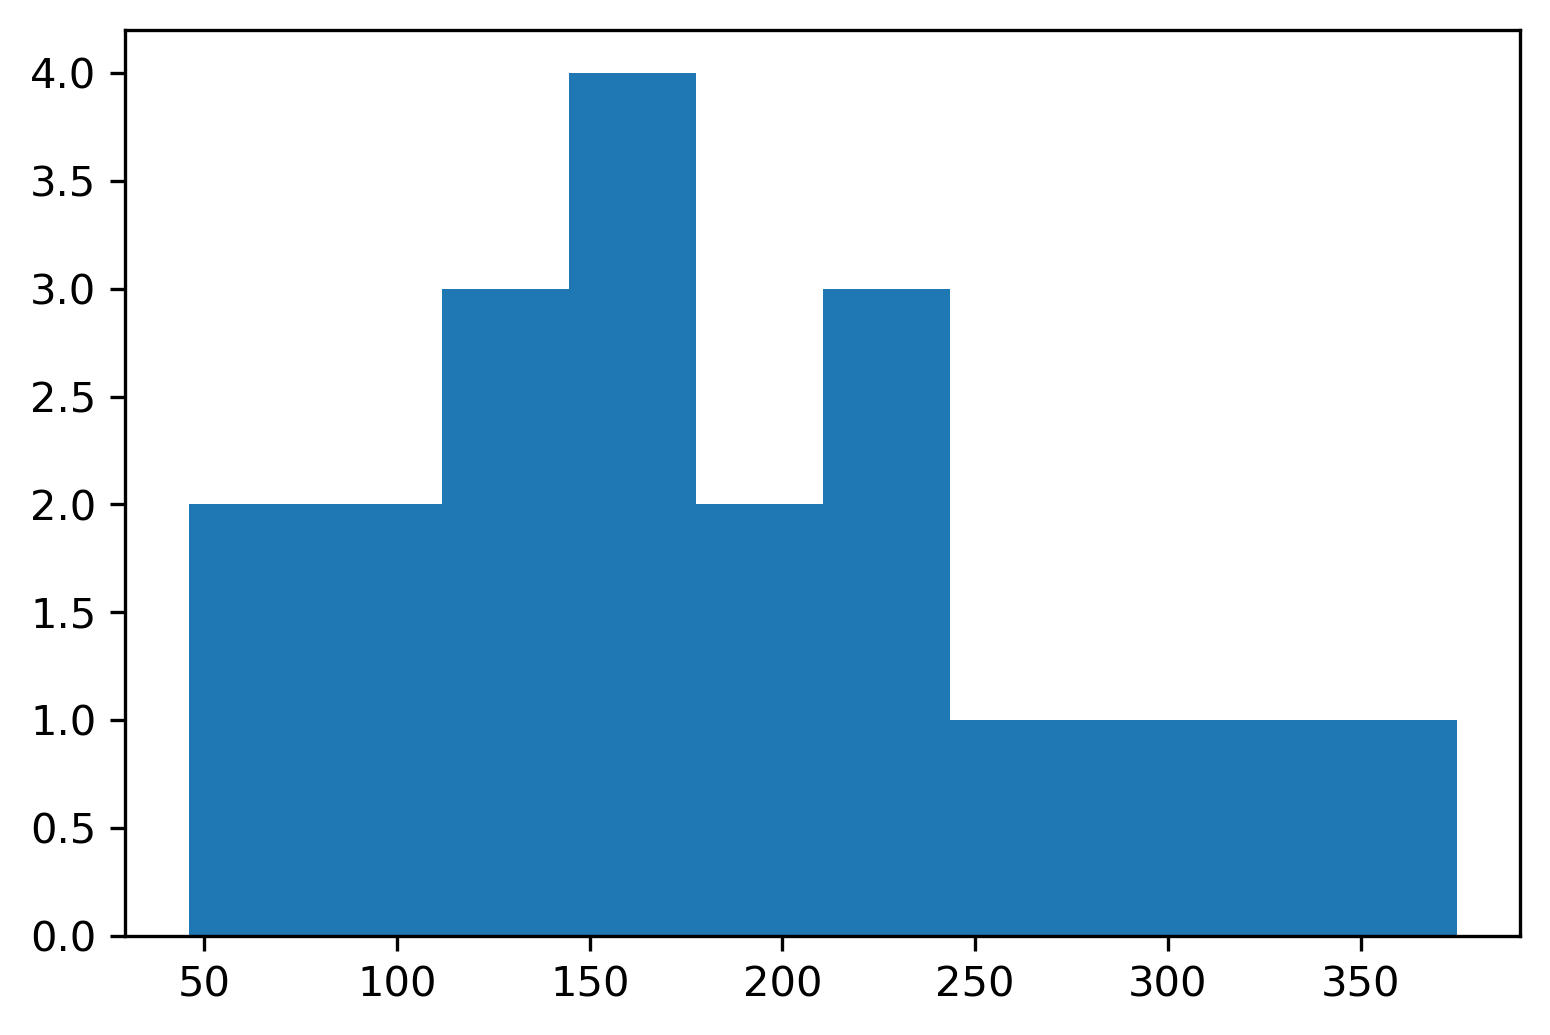

In [65]:
plt.hist(rise_times_clust)
plt.show()

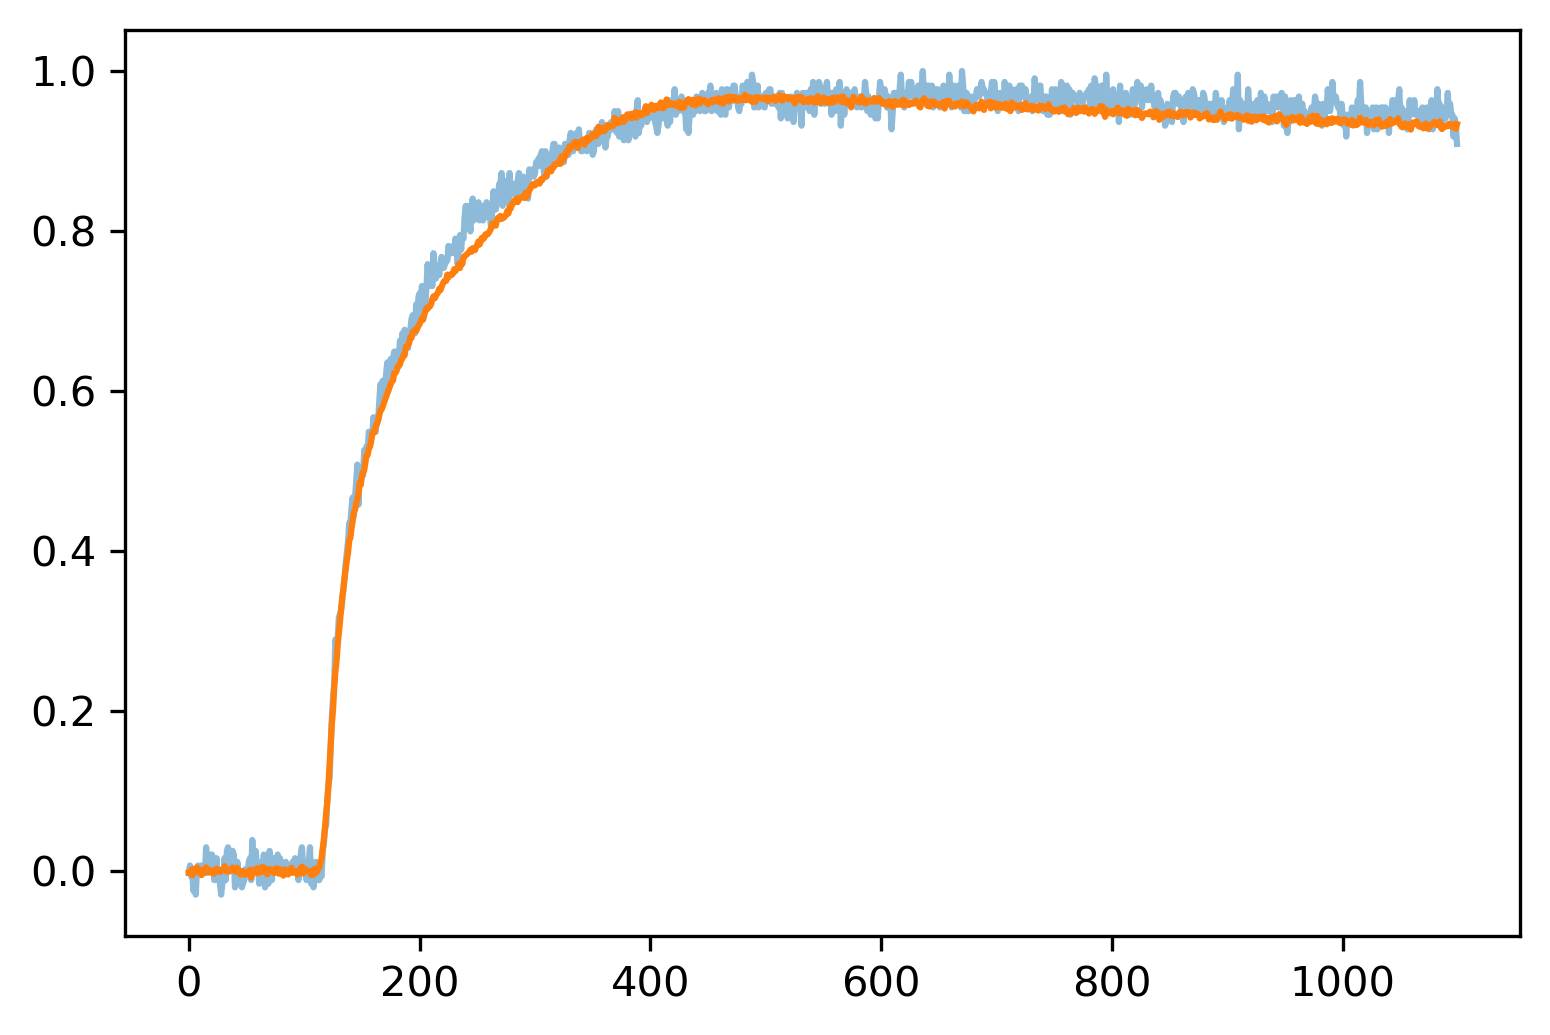

In [302]:
i = np.argmin(chi)
plt.plot(cs_photopeak_zero[i], alpha=0.5)
plt.plot(kmeans.cluster_centers_[kmeans.labels_[i]])
#plt.plot(cs_photopeak_zero[i]-kmeans.cluster_centers_[kmeans.labels_[i]])

In [208]:
np.argmax(rs)

2191

In [195]:
i = 0
sst = np.cumsum(np.square(cs_photopeak_zero[i]-np.mean(cs_photopeak_zero[i])))[-1]
sse = np.cumsum(np.square(cs_photopeak_zero[i]-kmeans.cluster_centers_[kmeans.labels_[i]]))[-1]

r = 1-sse/sst

In [196]:
r

0.9979855242267582

In [182]:
(cs_photopeak_zero[i]-np.mean(cs_photopeak_zero[i]))[:2]

array([-0.76955109, -0.75635036])

In [183]:
sum((cs_photopeak_zero[i]-np.mean(cs_photopeak_zero[i]))[:2])

-1.5259014504812256

In [216]:
chi2 = cluster_data(cs_photopeak_zero, 2)

In [220]:
np.mean(chi2)

53.776265342935346

In [18]:
chis = []
ns = list(range(10, 310, 10))
for n in tqdm(ns):
    chis.append(np.mean(cluster_data(cs_photopeak_zero, n)))

  0%|          | 0/30 [00:00<?, ?it/s]

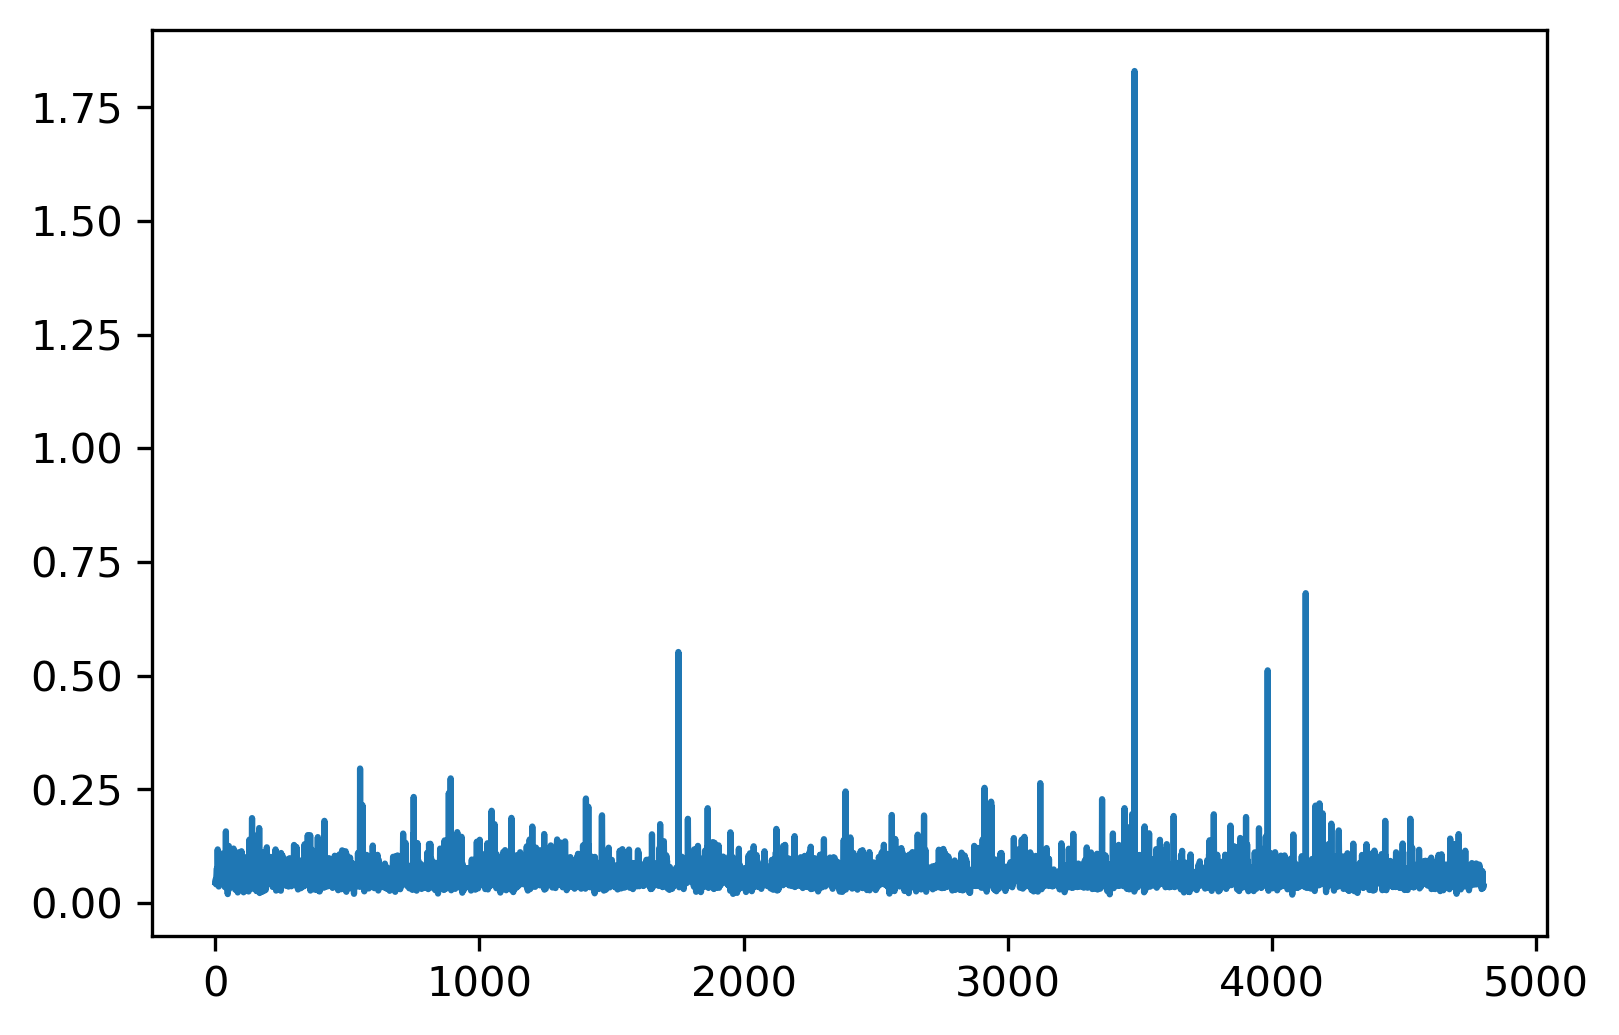

In [298]:
plt.plot(chi)

In [343]:
chis = np.array(chis)

In [344]:
chis = chis[~np.isnan(chis)]

In [338]:
def fit_func(x, a, b):
    return a/x+b
curve_fit(fit_func, ns, chis)

ValueError: array must not contain infs or NaNs

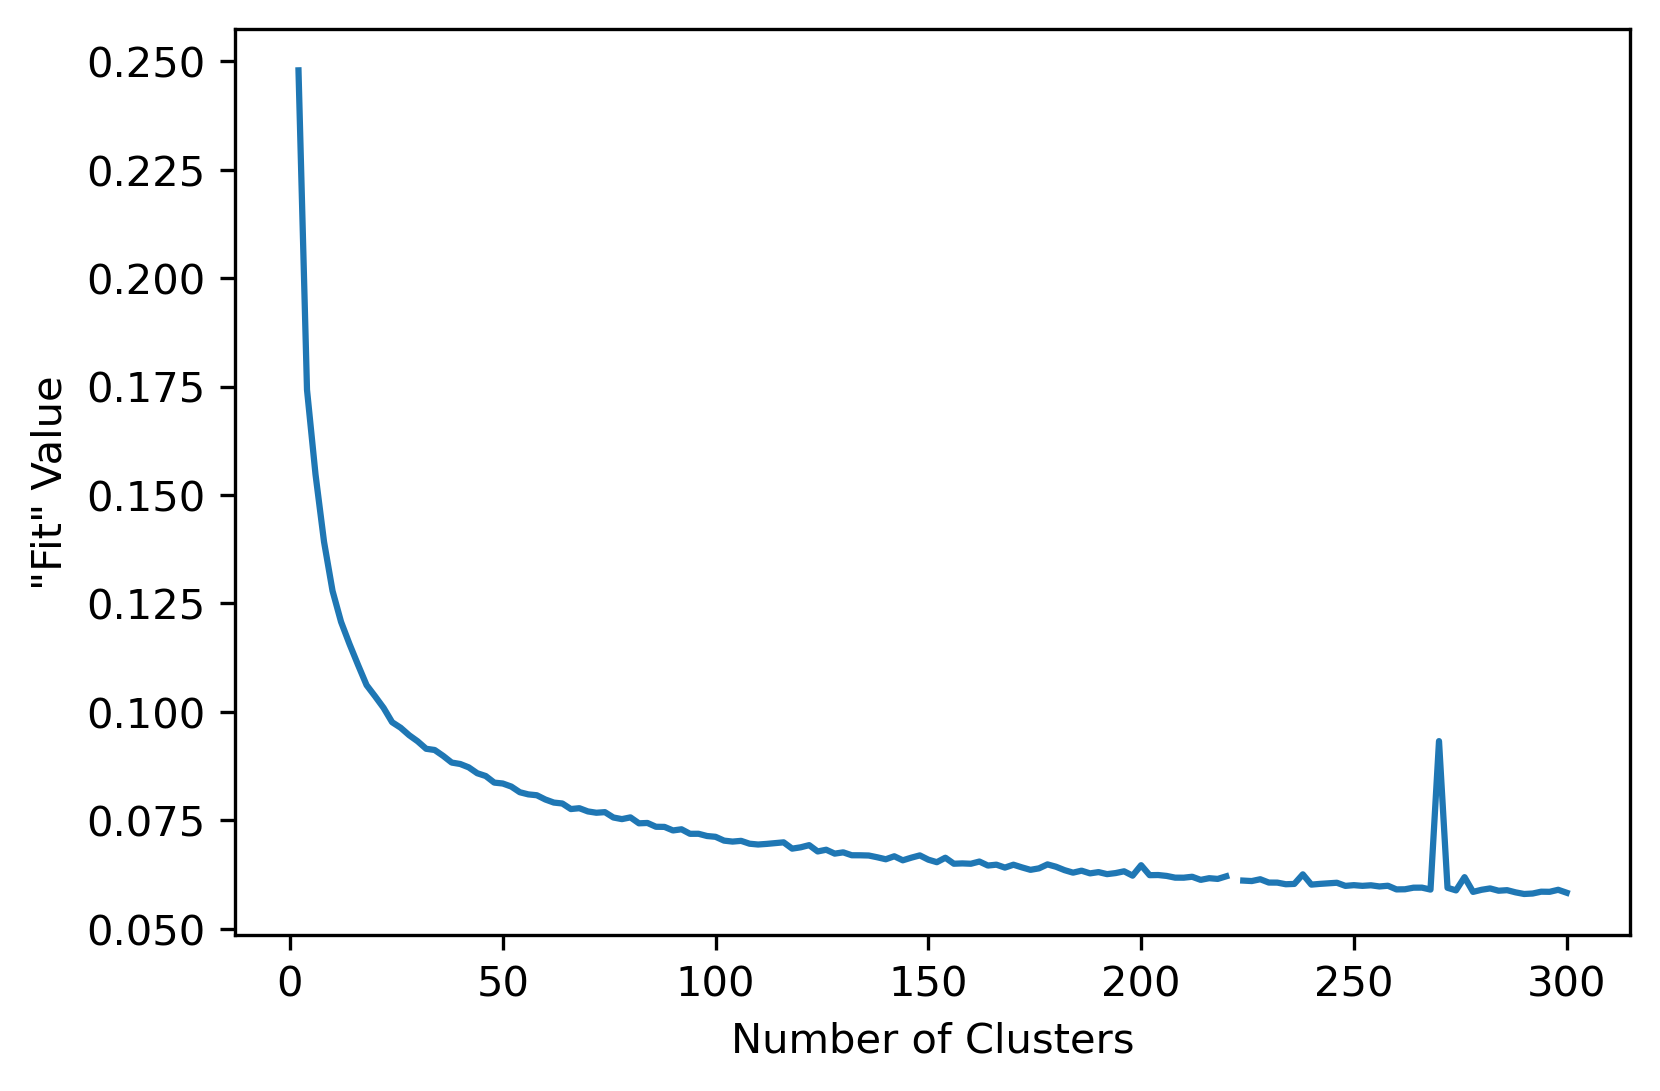

In [347]:
plt.plot(ns, chis)
plt.xlabel('Number of Clusters')
plt.ylabel('"Fit" Value')
#plt.xlim(295, 300)
plt.show()

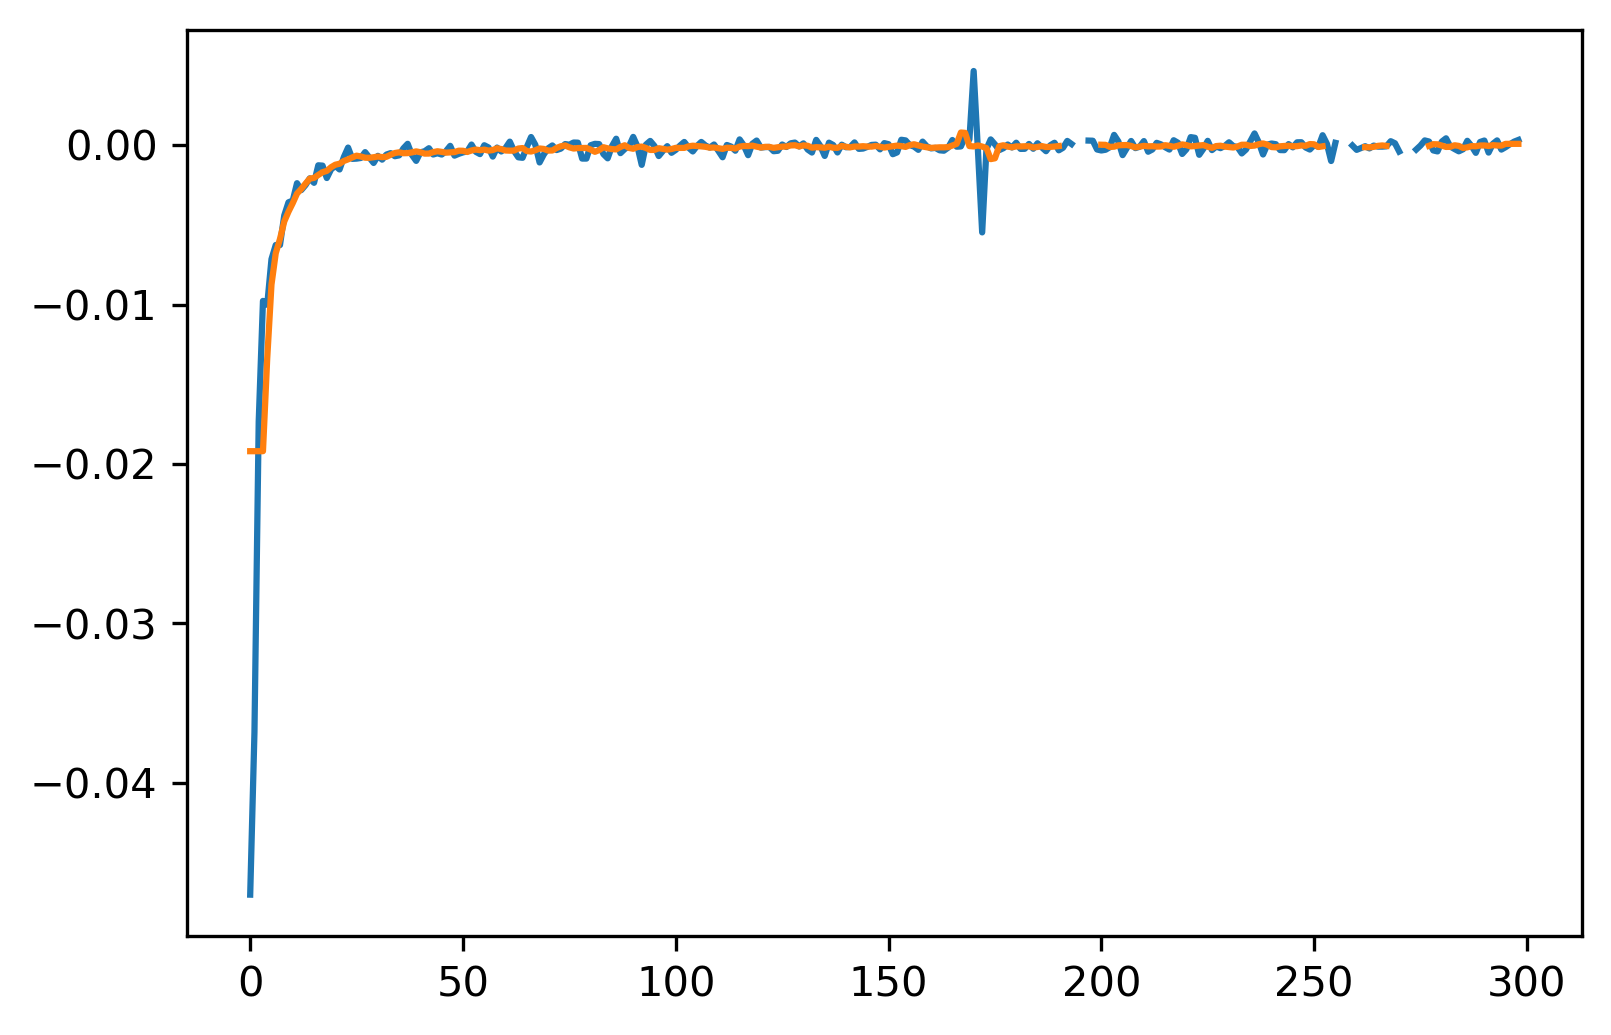

In [336]:
plt.plot(np.gradient(chis))
plt.plot(savgol_filter(np.gradient(chis), 7, 0))

In [229]:
np.where((cs_photopeak_zero[0] >= 0.1) & (cs_photopeak_zero[0] <= 0.9), 1, 0)

array([0, 0, 0, ..., 0, 0, 0])

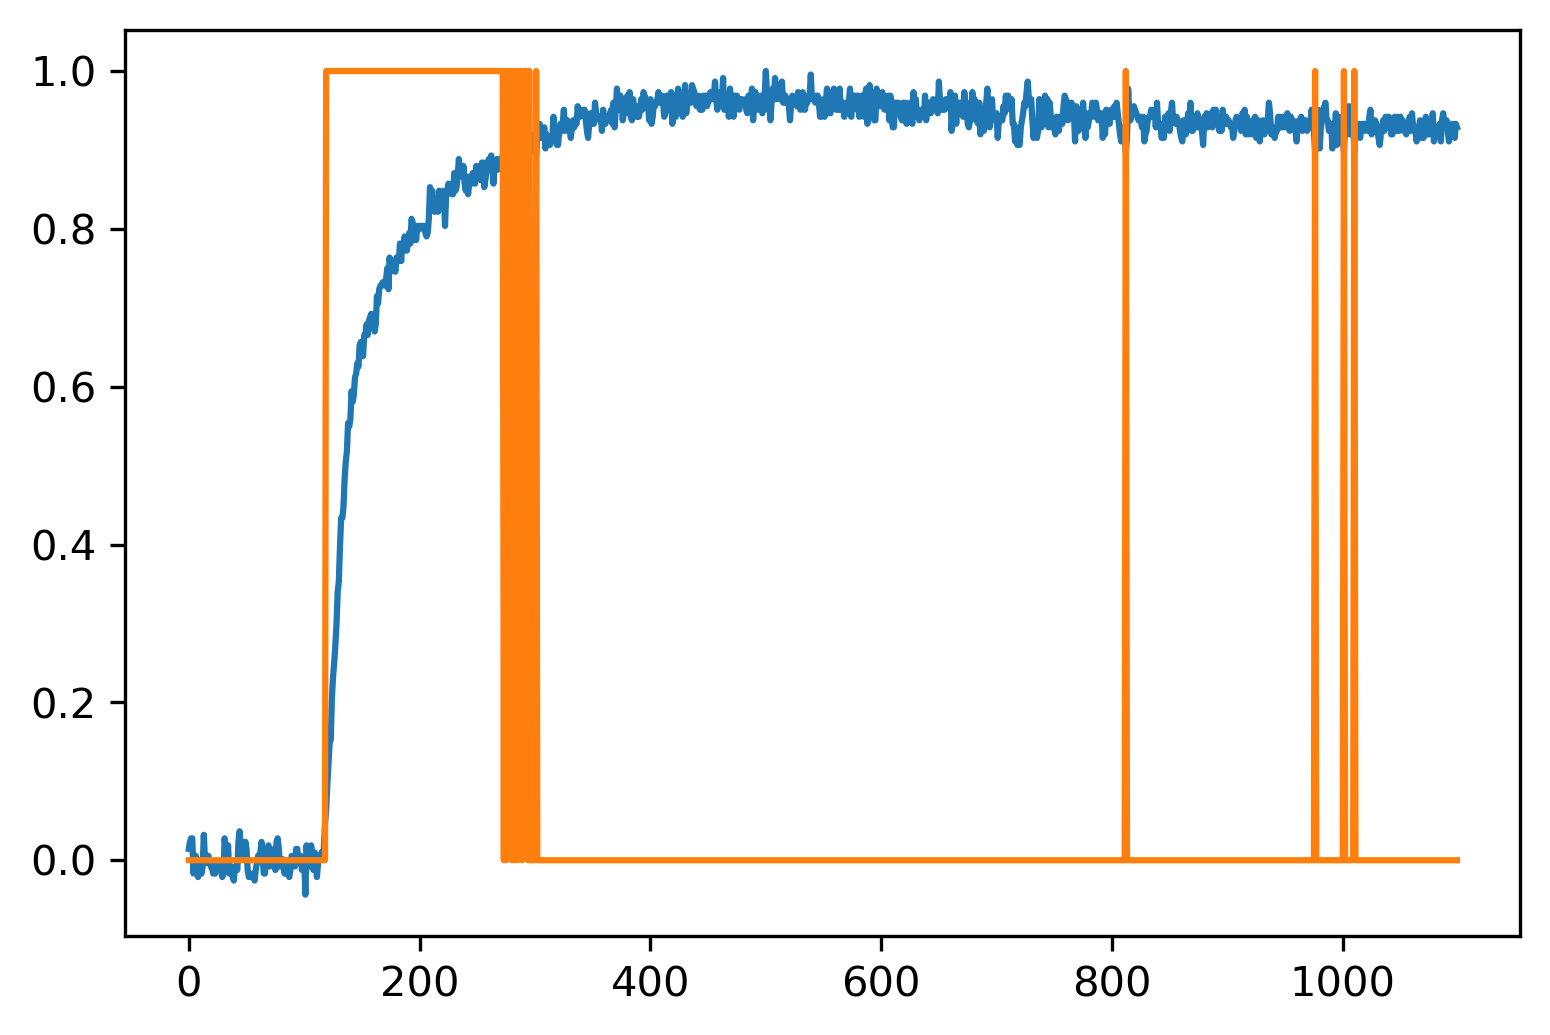

In [233]:
i = 1
plt.plot(cs_photopeak_zero[i])
plt.plot(np.where((cs_photopeak_zero[i] >= 0.05) & (cs_photopeak_zero[i] <= 0.9), 1, 0))

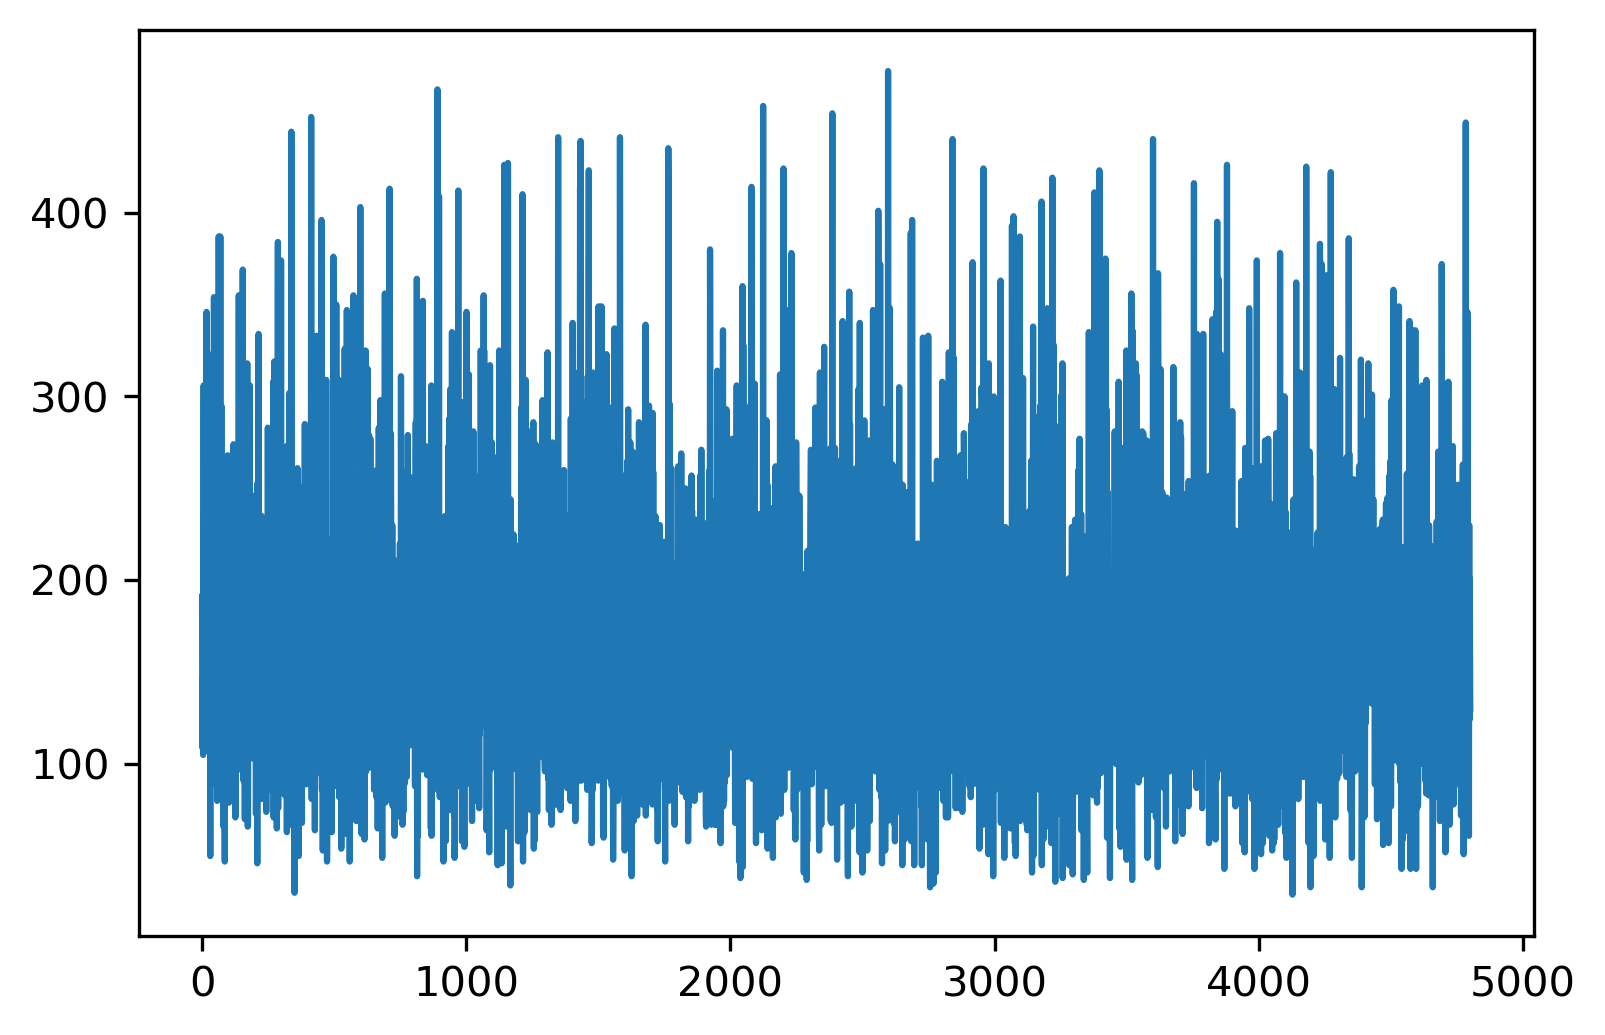

In [247]:
plt.plot(rise_times)

In [250]:
test = np.ones(len(cs_photopeak_zero[0]))*0.1

In [251]:
test[200:400] = np.ones(400-200)*0.9

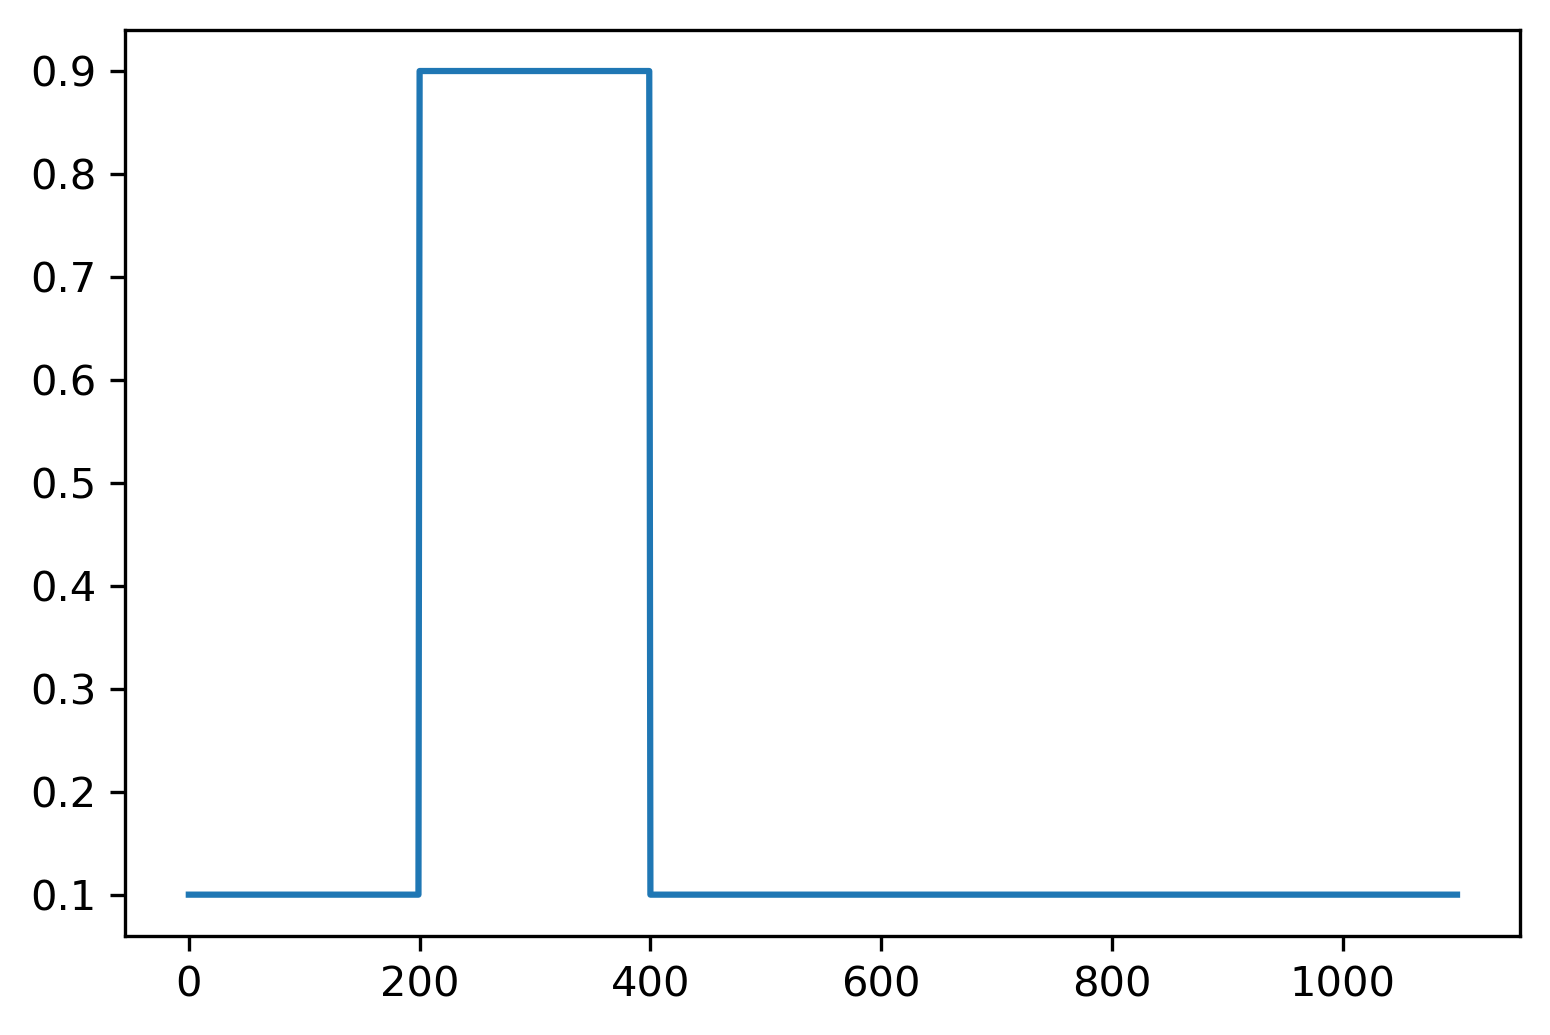

In [252]:
plt.plot(test)

In [258]:
kmeans.

KMeans(init='random', max_iter=2000, n_clusters=250, random_state=42)

In [265]:
i

4801

In [349]:
rise_times = []
for pp in range(len(cs_photopeak_zero)):
    signal = savgol_filter(cs_photopeak_zero[pp], 31, 0)
    rise_times.append([CFD(signal, 0.1, samp_size=50), CFD(signal, 0.9, samp_size=50)])

clusts = kmeans.labels_
#chisq = []
for i in range(len(clusts)):
    weight = np.zeros(len(cs_photopeak_zero[i]))
    weight[rise_times[i][0]:rise_times[i][1]+50] = np.ones((rise_times[i][1]+50)-(rise_times[i][0]))
    #weight = weight/sum(weight)
    #sst = np.cumsum(np.square(data[i]-np.mean(data[i])))[-1]
    val = weight*np.abs((cs_photopeak_zero[i]-kmeans.cluster_centers_[kmeans.labels_[i]])/kmeans.cluster_centers_[kmeans.labels_[i]])
    #sse = np.cumsum(np.square(data[i]-kmeans.cluster_centers_[kmeans.labels_[i]])/kmeans.cluster_centers_[kmeans.labels_[i]])[-1]

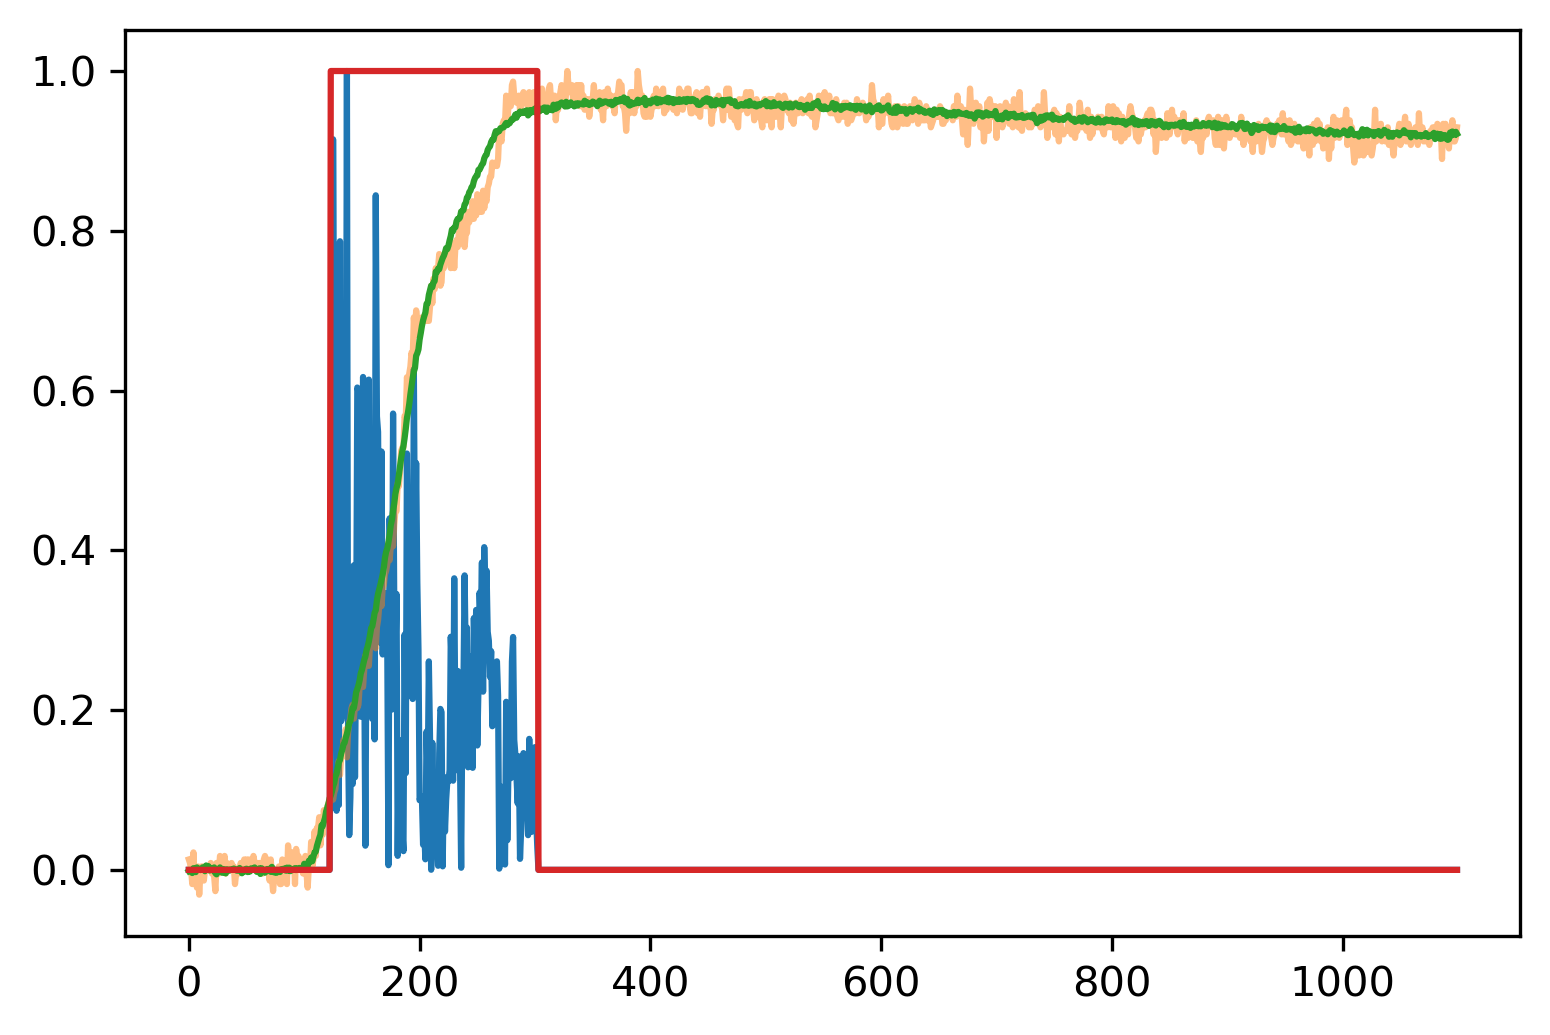

In [350]:


plt.plot(val/max(val))
plt.plot(cs_photopeak_zero[i], alpha=0.5)
plt.plot(kmeans.cluster_centers_[kmeans.labels_[i]])
plt.plot(weight)

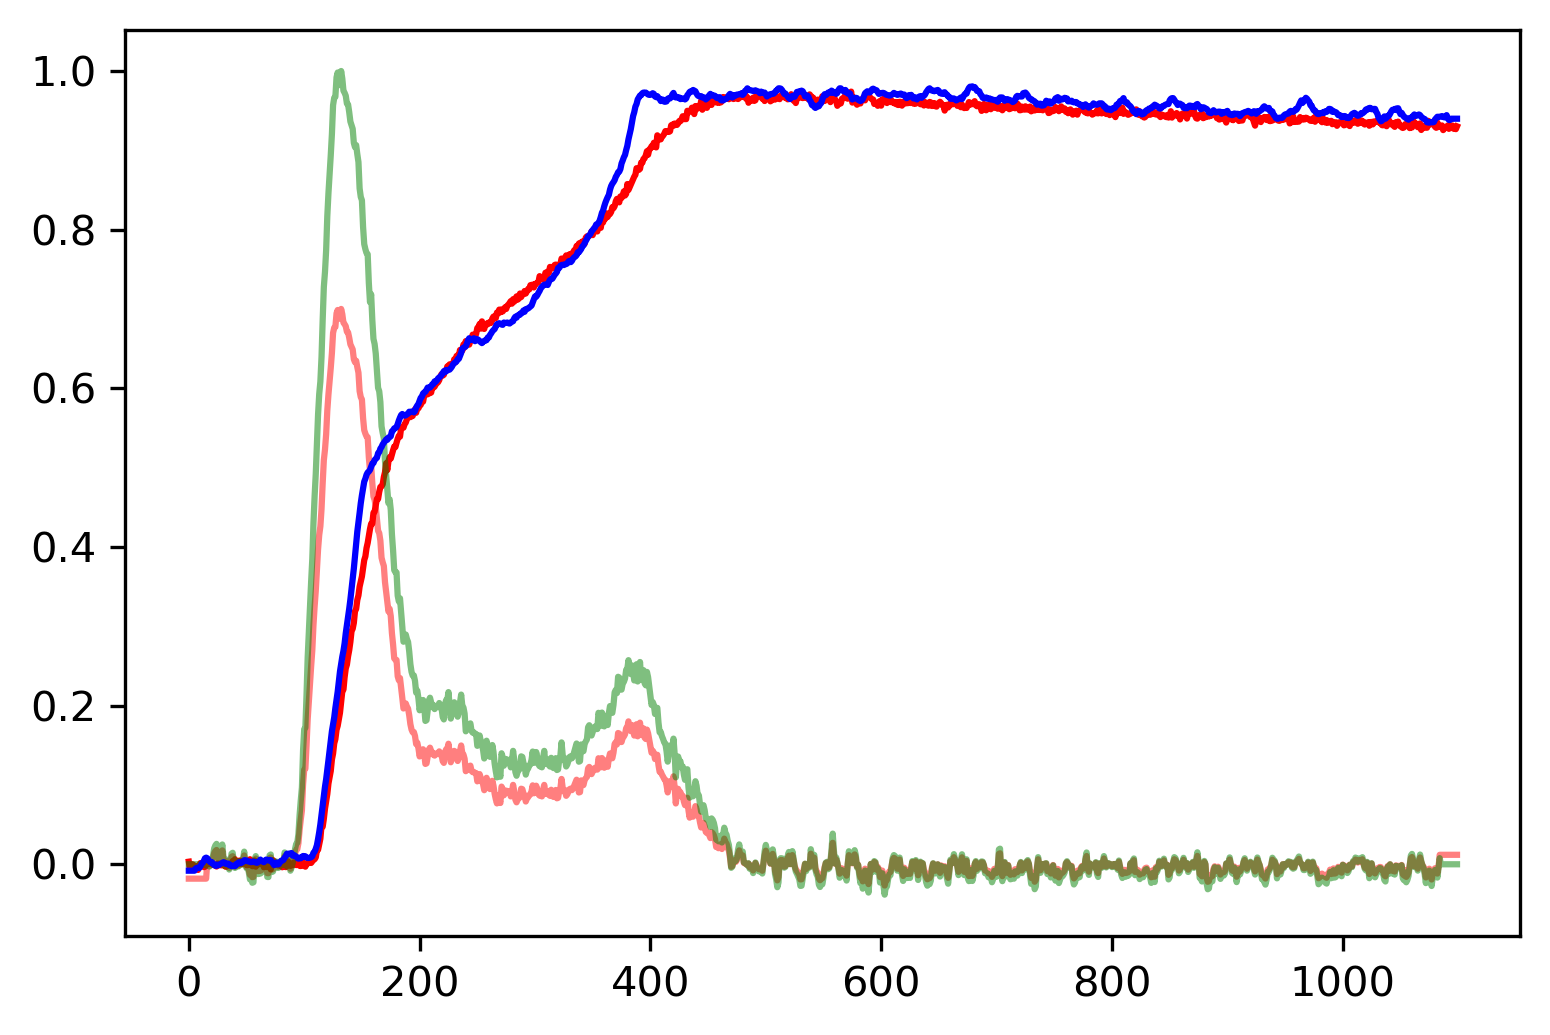

In [370]:
i = 100
plt.plot(kmeans.cluster_centers_[kmeans.labels_[i]], color='r')
plt.plot(savgol_filter(np.gradient(kmeans.cluster_centers_[kmeans.labels_[i]])/max(np.gradient(kmeans.cluster_centers_[kmeans.labels_[i]])), 31, 0), c='r', alpha=0.5)
plt.plot(np.gradient(savgol_filter(kmeans.cluster_centers_[kmeans.labels_[i]], 31, 0))/max(np.gradient(savgol_filter(kmeans.cluster_centers_[kmeans.labels_[i]], 31, 0))), c='g', alpha=0.5)
plt.plot(savgol_filter(cs_photopeak_zero[i], 11, 0), color='b')